<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

 <h3 color ='red'>2.2.2. Performance Metric OR KPI(Key Performance Indicators)</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [176]:
data = pd.read_csv('training_variants')
print('Number of data points : ',data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [177]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [178]:
####################################**********************************************
for index,row in data_text.iterrows():
    print(index,row,sep = '\n')

0
ID                                                      0
TEXT    Cyclin-dependent kinases (CDKs) regulate a var...
Name: 0, dtype: object
1
ID                                                      1
TEXT     Abstract Background  Non-small cell lung canc...
Name: 1, dtype: object
2
ID                                                      2
TEXT     Abstract Background  Non-small cell lung canc...
Name: 2, dtype: object
3
ID                                                      3
TEXT    Recent evidence has demonstrated that acquired...
Name: 3, dtype: object
4
ID                                                      4
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 4, dtype: object
5
ID                                                      5
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 5, dtype: object
6
ID                                                      6
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 6, dtype: object
7
ID         

Name: 72, dtype: object
73
ID                                                     73
TEXT    Metastatic solid tumors are almost invariably ...
Name: 73, dtype: object
74
ID                                                     74
TEXT    Mre11, Rad50, and Nbs1 function in a protein c...
Name: 74, dtype: object
75
ID                                                     75
TEXT    The cyclin-dependent protein kinases, or cdks,...
Name: 75, dtype: object
76
ID                                                     76
TEXT    OF THE GENERALIZATIONS TO emerge from studies ...
Name: 76, dtype: object
77
ID                                                     77
TEXT    OF THE GENERALIZATIONS TO emerge from studies ...
Name: 77, dtype: object
78
ID                                                     78
TEXT    The activities of cyclin D-dependent kinases s...
Name: 78, dtype: object
79
ID                                                     79
TEXT    OF THE GENERALIZATIONS TO emerge from studies ...

Name: 183, dtype: object
184
ID                                                    184
TEXT    Nonâ€“small-cell lung cancer is the leading ca...
Name: 184, dtype: object
185
ID                                                    185
TEXT    â€˜Classical' mutations in the EGFR tyrosine k...
Name: 185, dtype: object
186
ID                                                    186
TEXT    Mutations in the epidermal growth factor recep...
Name: 186, dtype: object
187
ID                                                    187
TEXT     Abstract  Malignant pleural effusions (MPEs) ...
Name: 187, dtype: object
188
ID                                                    188
TEXT    Somatic mutations in the tyrosine kinase (TK) ...
Name: 188, dtype: object
189
ID                                                    189
TEXT    Gefitinib is effective as first-line therapy f...
Name: 189, dtype: object
190
ID                                                    190
TEXT    A feature of many gliomas is the am

Name: 283, dtype: object
284
ID                                                    284
TEXT    The genetic factors that determine the risk of...
Name: 284, dtype: object
285
ID                                                    285
TEXT    Poorly differentiated thyroid cancer (PDTC) an...
Name: 285, dtype: object
286
ID                                                    286
TEXT    In eukaryotic cells, DNA is packaged into chro...
Name: 286, dtype: object
287
ID                                                    287
TEXT    In eukaryotic cells, DNA is packaged into chro...
Name: 287, dtype: object
288
ID                                                    288
TEXT    Brd4 belongs to the BET family of nuclear prot...
Name: 288, dtype: object
289
ID                                                    289
TEXT    NUT midline carcinoma (NMC) is a genetically d...
Name: 289, dtype: object
290
ID                                                    290
TEXT    Follicular lymphoma, the most commo

Name: 415, dtype: object
416
ID                                                    416
TEXT    The effects of chlorpromazine on various prope...
Name: 416, dtype: object
417
ID                                                    417
TEXT    Approximately half of all hereditary breast ca...
Name: 417, dtype: object
418
ID                                                    418
TEXT    Many p53 missense mutations possess dominant-n...
Name: 418, dtype: object
419
ID                                                    419
TEXT    Mortality of patients with head and neck squam...
Name: 419, dtype: object
420
ID                                                    420
TEXT    Down-regulation of p53 expression has been fou...
Name: 420, dtype: object
421
ID                                                    421
TEXT    Critical determinants of DNA recognition by p5...
Name: 421, dtype: object
422
ID                                                    422
TEXT    The tumor suppressor protein p53 is

Name: 508, dtype: object
509
ID                                                    509
TEXT    Tumor suppressor p53 is a sequence-specific DN...
Name: 509, dtype: object
510
ID                                                    510
TEXT    p53 is the most frequently mutated tumor-suppr...
Name: 510, dtype: object
511
ID                                                    511
TEXT    Tumor-derived mutant forms of p53 compromise i...
Name: 511, dtype: object
512
ID                                                    512
TEXT    The tumor suppressor gene p53 has been implica...
Name: 512, dtype: object
513
ID                                                    513
TEXT    Critical determinants of DNA recognition by p5...
Name: 513, dtype: object
514
ID                                                    514
TEXT    The tumor suppressor p53 is known as the â€œgu...
Name: 514, dtype: object
515
ID                                                    515
TEXT    Mutations in the p53 tumor suppress

566
ID                                                    566
TEXT    Activation of the canonical TGF-Î² signaling p...
Name: 566, dtype: object
567
ID                                                    567
TEXT    Hub proteins are connected through binding int...
Name: 567, dtype: object
568
ID                                                    568
TEXT    Hub proteins are connected through binding int...
Name: 568, dtype: object
569
ID                                                    569
TEXT    Hub proteins are connected through binding int...
Name: 569, dtype: object
570
ID                                                    570
TEXT    Hub proteins are connected through binding int...
Name: 570, dtype: object
571
ID                                                    571
TEXT    Transforming growth factor Î² (TGFÎ²) activate...
Name: 571, dtype: object
572
ID                                                    572
TEXT    Transforming growth factor Î² (TGFÎ²) activate...
Name: 572,

Name: 630, dtype: object
631
ID                                                    631
TEXT    This study focused on a cell cycle regulatory ...
Name: 631, dtype: object
632
ID                                                    632
TEXT    Background  Melanoma is a heterogeneous tumor ...
Name: 632, dtype: object
633
ID                                                    633
TEXT    FBXW7 encodes the substrate recognition compon...
Name: 633, dtype: object
634
ID                                                    634
TEXT    Aberrant activation of the canonical Wnt/Î²-ca...
Name: 634, dtype: object
635
ID                                                    635
TEXT    The cell cycle inhibitor p21CDKN1A induces cel...
Name: 635, dtype: object
636
ID                                                    636
TEXT    INTRODUCTION Loss of control of the mammalian ...
Name: 636, dtype: object
637
ID                                                    637
TEXT    Several groups have recently isolat

ID                                                    865
TEXT    Sarcomas constitute some of the most aggressiv...
Name: 865, dtype: object
866
ID                                                    866
TEXT    Thet(16;21)(pll;q22)translocationIsa recurrent...
Name: 866, dtype: object
867
ID                                                    867
TEXT    A step toward the molecular classification of ...
Name: 867, dtype: object
868
ID                                                    868
TEXT    A new variant of the HLA-A*010101 allele desig...
Name: 868, dtype: object
869
ID                                                    869
TEXT    The transplantation of haematopoietic stem cel...
Name: 869, dtype: object
870
ID                                                    870
TEXT     Abstract  Characterization of a novel HLA-B n...
Name: 870, dtype: object
871
ID                                                    871
TEXT    Introduction  Pediatric high-grade gliomas (HG...
Name: 871, dty

Name: 1017, dtype: object
1018
ID                                                   1018
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1018, dtype: object
1019
ID                                                   1019
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1019, dtype: object
1020
ID                                                   1020
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1020, dtype: object
1021
ID                                                   1021
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1021, dtype: object
1022
ID                                                   1022
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1022, dtype: object
1023
ID                                                   1023
TEXT    Tuberous sclerosis complex (TSC) is an autosom...
Name: 1023, dtype: object
1024
ID                                                   1024
TEXT    Hamartin and tuberin 

Name: 1183, dtype: object
1184
ID                                                   1184
TEXT    The PI3K/PTEN/AKT signaling pathway, a pathway...
Name: 1184, dtype: object
1185
ID                                                   1185
TEXT    The PI3K/PTEN/AKT signaling pathway, a pathway...
Name: 1185, dtype: object
1186
ID                                                   1186
TEXT     Introduction In 2004, Samuels et al. reported...
Name: 1186, dtype: object
1187
ID                                                   1187
TEXT    Activation of the phosphoinositide 3-kinase (P...
Name: 1187, dtype: object
1188
ID                                                   1188
TEXT    Purpose  The goal of this study was to compreh...
Name: 1188, dtype: object
1189
ID                                                   1189
TEXT    PIK3CA-related overgrowth spectrum (PROS) incl...
Name: 1189, dtype: object
1190
ID                                                   1190
TEXT     ABSTRACT Germline mu

Name: 1394, dtype: object
1395
ID                                                   1395
TEXT    Frequent genetic alterations discovered in FGF...
Name: 1395, dtype: object
1396
ID                                                   1396
TEXT    Introduction Hypochondroplasia (MIM 146000) is...
Name: 1396, dtype: object
1397
ID                                                   1397
TEXT    Frequent genetic alterations discovered in FGF...
Name: 1397, dtype: object
1398
ID                                                   1398
TEXT     Abstract  Multiple myeloma is a genetically h...
Name: 1398, dtype: object
1399
ID                                                   1399
TEXT    Frequent genetic alterations discovered in FGF...
Name: 1399, dtype: object
1400
ID                                                   1400
TEXT    Frequent genetic alterations discovered in FGF...
Name: 1400, dtype: object
1401
ID                                                   1401
TEXT    Frequent genetic alte

Name: 1492, dtype: object
1493
ID                                                   1493
TEXT    Activating mutations in the tyrosine kinase do...
Name: 1493, dtype: object
1494
ID                                                   1494
TEXT    Oncogenic activation of tyrosine kinases is a ...
Name: 1494, dtype: object
1495
ID                                                   1495
TEXT    Oncogenic activation of tyrosine kinases is a ...
Name: 1495, dtype: object
1496
ID                                                   1496
TEXT    Activating mutations in the tyrosine kinase do...
Name: 1496, dtype: object
1497
ID                                                   1497
TEXT     Abstract Fibroblast growth factor receptor 2 ...
Name: 1497, dtype: object
1498
ID                                                   1498
TEXT    We sought to identify fibroblast growth factor...
Name: 1498, dtype: object
1499
ID                                                   1499
TEXT    Endometrial carcinoma

1676
ID                                                   1676
TEXT    An internal tandem duplication (ITD) of the FL...
Name: 1676, dtype: object
1677
ID                                                   1677
TEXT    An internal tandem duplication (ITD) of the FL...
Name: 1677, dtype: object
1678
ID                                                   1678
TEXT    In acute myeloid leukemia (AML), two clusters ...
Name: 1678, dtype: object
1679
ID                                                   1679
TEXT    An internal tandem duplication (ITD) of the FL...
Name: 1679, dtype: object
1680
ID                                                   1680
TEXT    Introduction  FLT3, a class 3 receptor tyrosin...
Name: 1680, dtype: object
1681
ID                                                   1681
TEXT    Mutations in the juxtamembrane and kinase doma...
Name: 1681, dtype: object
1682
ID                                                   1682
TEXT    An internal tandem duplication (ITD) of the FL.

1786
ID                                                   1786
TEXT    Androgen receptor (AR) splice variants lacking...
Name: 1786, dtype: object
1787
ID                                                   1787
TEXT    Androgen receptor (AR) mutations are associate...
Name: 1787, dtype: object
1788
ID                                                   1788
TEXT    An androgen receptor (AR) gene mutation identi...
Name: 1788, dtype: object
1789
ID                                                   1789
TEXT    An androgen receptor (AR) gene mutation identi...
Name: 1789, dtype: object
1790
ID                                                   1790
TEXT    Androgen receptor (AR) mutations are associate...
Name: 1790, dtype: object
1791
ID                                                   1791
TEXT    Most prostate cancers (PCs) become resistant t...
Name: 1791, dtype: object
1792
ID                                                   1792
TEXT    Most prostate cancers (PCs) become resistant t.

ID                                                   1932
TEXT    Hedgehog (Hh) pathway activation promotes tumo...
Name: 1932, dtype: object
1933
ID                                                   1933
TEXT    Inappropriate Hedgehog (Hh) signaling has been...
Name: 1933, dtype: object
1934
ID                                                   1934
TEXT    Three new BENTA patients sharing the same nove...
Name: 1934, dtype: object
1935
ID                                                   1935
TEXT    The regulated activation of NF-ÎºB by antigen ...
Name: 1935, dtype: object
1936
ID                                                   1936
TEXT    Left ventricular (LV) remodeling is a signific...
Name: 1936, dtype: object
1937
ID                                                   1937
TEXT    Self-tolerance and immunity are actively acqui...
Name: 1937, dtype: object
1938
ID                                                   1938
TEXT    Self-tolerance and immunity are actively acqui...
Na

Name: 2119, dtype: object
2120
ID                                                   2120
TEXT    Leukaemic mantle cell lymphoma is considered t...
Name: 2120, dtype: object
2121
ID                                                   2121
TEXT    A series of our previous studies demonstrated ...
Name: 2121, dtype: object
2122
ID                                                   2122
TEXT    The activities of cyclin D-dependent kinases s...
Name: 2122, dtype: object
2123
ID                                                   2123
TEXT     Abstract A gene expression signature of tumor...
Name: 2123, dtype: object
2124
ID                                                   2124
TEXT    Although cyclin D1 is overexpressed in a signi...
Name: 2124, dtype: object
2125
ID                                                   2125
TEXT    The activities of cyclin D-dependent kinases s...
Name: 2125, dtype: object
2126
ID                                                   2126
TEXT    This is a comprehensi

2182
ID                                                   2182
TEXT     ABSTRACT To look for a direct role of ultravi...
Name: 2182, dtype: object
2183
ID                                                   2183
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2183, dtype: object
2184
ID                                                   2184
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2184, dtype: object
2185
ID                                                   2185
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2185, dtype: object
2186
ID                                                   2186
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2186, dtype: object
2187
ID                                                   2187
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2187, dtype: object
2188
ID                                                   2188
TEXT    The PTEN (phosphatase and tensin homolog) phos.

Name: 2397, dtype: object
2398
ID                                                   2398
TEXT    Ras (p21'as) interacts directly with the catal...
Name: 2398, dtype: object
2399
ID                                                   2399
TEXT    Ras (p21'as) interacts directly with the catal...
Name: 2399, dtype: object
2400
ID                                                   2400
TEXT    Ras (p21'as) interacts directly with the catal...
Name: 2400, dtype: object
2401
ID                                                   2401
TEXT     RasGAPs supply a catalytic residue, termed th...
Name: 2401, dtype: object
2402
ID                                                   2402
TEXT    Ras (p21'as) interacts directly with the catal...
Name: 2402, dtype: object
2403
ID                                                   2403
TEXT    Ras (p21'as) interacts directly with the catal...
Name: 2403, dtype: object
2404
ID                                                   2404
TEXT    Cancer therapy has ar

Name: 2559, dtype: object
2560
ID                                                   2560
TEXT    Mutations in BRCA1 and BRCA2 account for the m...
Name: 2560, dtype: object
2561
ID                                                   2561
TEXT    Mutations in BRCA1 and BRCA2 account for the m...
Name: 2561, dtype: object
2562
ID                                                   2562
TEXT     Abstract Germline mutations in the tumor supp...
Name: 2562, dtype: object
2563
ID                                                   2563
TEXT    Genetic screening of the breast and ovarian ca...
Name: 2563, dtype: object
2564
ID                                                   2564
TEXT     Abstract  The BRCA1 gene from individuals at ...
Name: 2564, dtype: object
2565
ID                                                   2565
TEXT    Genetic screening of the breast and ovarian ca...
Name: 2565, dtype: object
2566
ID                                                   2566
TEXT    Genetic screening of 

2681
ID                                                   2681
TEXT    Kinase inhibitors are accepted treatment for m...
Name: 2681, dtype: object
2682
ID                                                   2682
TEXT     Noonan syndrome is characterized by short sta...
Name: 2682, dtype: object
2683
ID                                                   2683
TEXT    Over 30 mutations of the B-RAF gene associated...
Name: 2683, dtype: object
2684
ID                                                   2684
TEXT    Mutational hotspots indicate selective pressur...
Name: 2684, dtype: object
2685
ID                                                   2685
TEXT     Abstract Activating mutations of the BRAF gen...
Name: 2685, dtype: object
2686
ID                                                   2686
TEXT     Cardio-facio-cutaneous (CFC) syndrome is char...
Name: 2686, dtype: object
2687
ID                                                   2687
TEXT    We have identifi ed previously undiscovered BR.

2931
ID                                                   2931
TEXT    The Nrf2 (nuclear factor erythroid 2 [NF-E2]-r...
Name: 2931, dtype: object
2932
ID                                                   2932
TEXT    The Nrf2 (nuclear factor erythroid 2 [NF-E2]-r...
Name: 2932, dtype: object
2933
ID                                                   2933
TEXT    Hedgehog signaling is essential for tissue dev...
Name: 2933, dtype: object
2934
ID                                                   2934
TEXT    Oligodendroglioma is characterized by unique c...
Name: 2934, dtype: object
2935
ID                                                   2935
TEXT    Brutonâ€™s tyrosine kinase (BTK), a member of ...
Name: 2935, dtype: object
2936
ID                                                   2936
TEXT    The Bruton tyrosine kinase (BTK) inhibitor, ib...
Name: 2936, dtype: object
2937
ID                                                   2937
TEXT    Brutonâ€™s tyrosine kinase (BTK), a member of .

Name: 3116, dtype: object
3117
ID                                                   3117
TEXT    Activating somatic and germline mutations of c...
Name: 3117, dtype: object
3118
ID                                                   3118
TEXT    KRAS mutations occur in one third of human can...
Name: 3118, dtype: object
3119
ID                                                   3119
TEXT    KRAS mutational status has been shown to be a ...
Name: 3119, dtype: object
3120
ID                                                   3120
TEXT    Abstract Introductionâ€”Concurrent signal tran...
Name: 3120, dtype: object
3121
ID                                                   3121
TEXT    Activating mutations of RAS are frequently obs...
Name: 3121, dtype: object
3122
ID                                                   3122
TEXT    Detecting preinvasive lesions and accurately d...
Name: 3122, dtype: object
3123
ID                                                   3123
TEXT    The KRAS gene is the 

ID                                                   3180
TEXT    Recently, a rare activating mutation of AKT1 (...
Name: 3180, dtype: object
3181
ID                                                   3181
TEXT    Ovarian cancer is the major cause of death fro...
Name: 3181, dtype: object
3182
ID                                                   3182
TEXT    Breast carcinoma is the leading cause of cance...
Name: 3182, dtype: object
3183
ID                                                   3183
TEXT    Burkitt lymphoma is a germinal center B-cell-d...
Name: 3183, dtype: object
3184
ID                                                   3184
TEXT     Abstract  The human T cell transcription fact...
Name: 3184, dtype: object
3185
ID                                                   3185
TEXT    We describe the case of a patient presenting w...
Name: 3185, dtype: object
3186
ID                                                   3186
TEXT    The mechanisms behind malignant progression in...
Na

<h3>3.1.3. Preprocessing of text</h3>

In [179]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [180]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 336.1040944095803 seconds


In [181]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [182]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [183]:
# result.loc[rows,col] = ....................
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [184]:
result[result['ID']==1277]

,ID,Gene,Variation,Class,TEXT
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [185]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [186]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

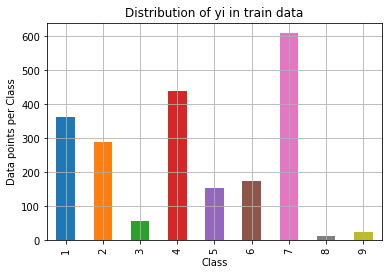

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


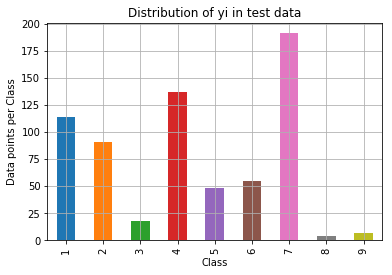

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


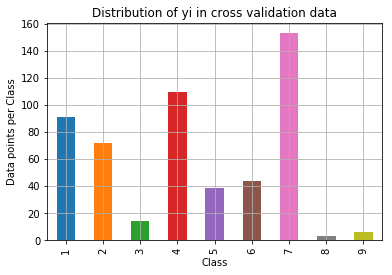

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [187]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [188]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.5620825413140924
Log loss on Test Data using Random Model 2.47569926666256
-------------------- Confusion matrix --------------------


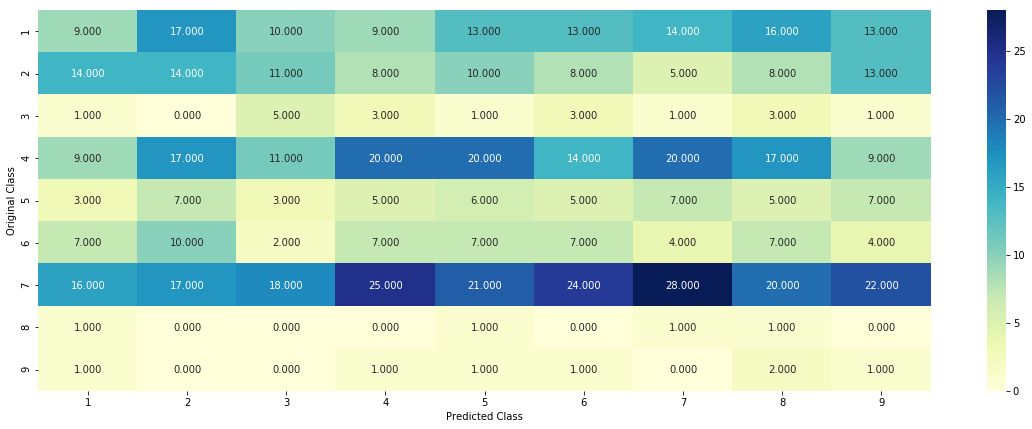

-------------------- Precision matrix (Columm Sum=1) --------------------


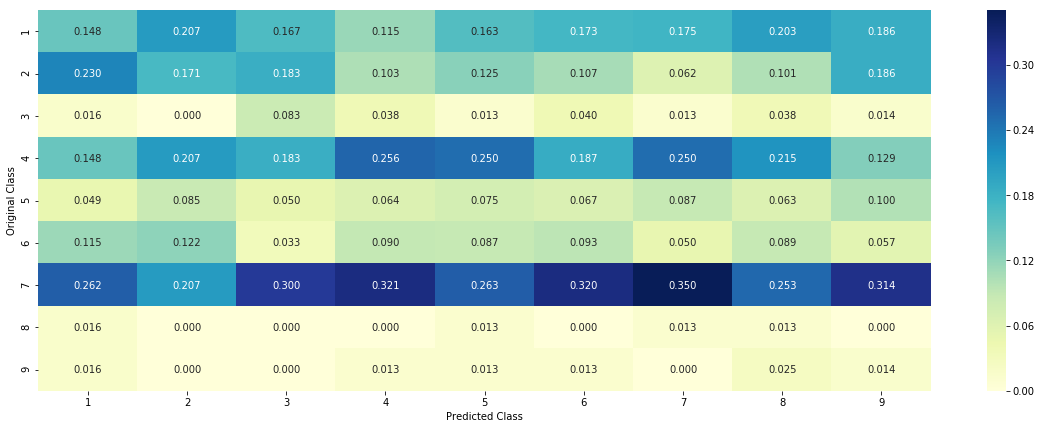

-------------------- Recall matrix (Row sum=1) --------------------


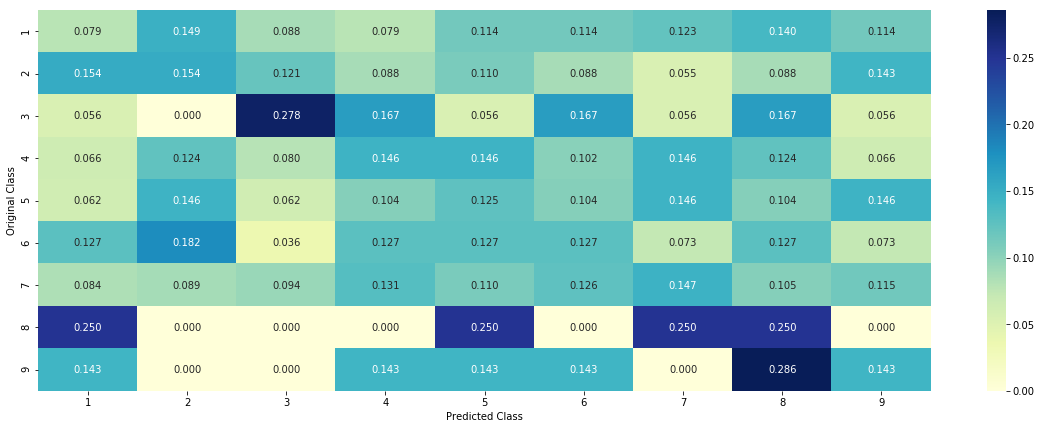

In [189]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [190]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']

# algorithm for Response Coding
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element in the Vector = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [191]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 236
BRCA1    164
TP53     107
BRCA2     84
EGFR      84
PTEN      81
KIT       65
BRAF      57
ALK       47
ERBB2     41
FGFR2     39
Name: Gene, dtype: int64


In [192]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 236 different categories of genes in the train data, and they are distibuted as follows


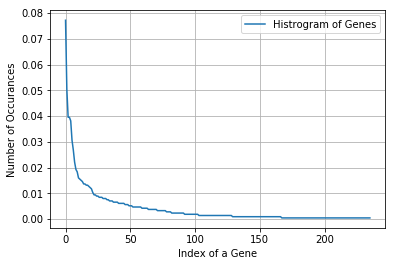

In [193]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


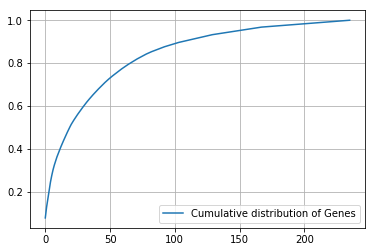

In [194]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()
#OBSERVATION --x  50th gene value > 75% of the total gene 

In [195]:
## Sample Printing
print(np.cumsum(h)[235])
print(np.cumsum(h)[49])
print(np.cumsum(h)[48])

0.999999999999996
0.7255178907721278
0.7203389830508472


<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [196]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [197]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [198]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [199]:
# Debugging
unique_variations[0]

63

In [200]:
train_df['Gene'].head(50)

3255     CASP8
319       ROS1
2692      BRAF
29        TERT
1759      IDH1
1785        AR
437       TP53
2197      PTEN
3296       RET
2042    MAP2K2
2002    MAP2K1
3082    NOTCH1
1119       MET
3162      RAF1
343       CDH1
1852      CTCF
2581     BRCA1
163       EGFR
2078      TET2
3265       RET
3038       KIT
2559     BRCA1
2067      SOX9
837       ABL1
3301     RUNX1
2403       NF1
476       TP53
1386     FGFR1
333       ROS1
2446     BRCA1
1803      ARAF
1000      TSC1
3166      RAF1
73       RAD50
260       EGFR
856       ABL1
486       TP53
1731      MSH2
174       EGFR
2771      BRAF
814      ERCC2
1586     CARM1
2325      JAK2
1954       ATM
2115     GATA3
2610     BRCA1
2460     BRCA1
2562     BRCA1
217       EGFR
2435     BRCA1
Name: Gene, dtype: object

In [201]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'ewsr1',
 'ezh2',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'gata3',
 'gli1',
 'gnaq',
 'gnas',
 'h3f3a',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 

In [202]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 235)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.4059030187892425
For values of alpha =  0.0001 The log loss is: 1.20670409748914
For values of alpha =  0.001 The log loss is: 1.2198450093197972
For values of alpha =  0.01 The log loss is: 1.3352572978403012
For values of alpha =  0.1 The log loss is: 1.442853570788702
For values of alpha =  1 The log loss is: 1.4781404112962173


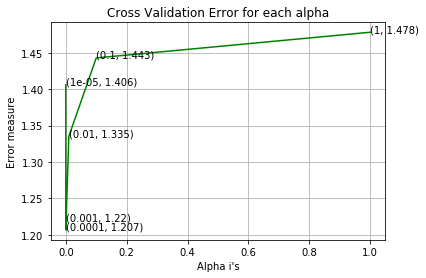

For values of best alpha =  0.0001 The train log loss is: 1.046639706944138
For values of best alpha =  0.0001 The cross validation log loss is: 1.20670409748914
For values of best alpha =  0.0001 The test log loss is: 1.18087553864529


In [203]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Note: Since in Above case Train Loss == Test Loss == CV Loss ,
* Hence the model is not overfitting and GENE Feature is stable Across All Datasets
*  And Since the Train, Test ,And CV logloss < (Logloss of Random Model , This model is Good to Go)

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [205]:
# To Find Overlapping between Train ,Test, And CV Data
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  236  genes in train dataset?
Ans
1. In test data 647 out of 665 : 97.29323308270676
2. In cross validation data 513 out of  532 : 96.42857142857143


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [206]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1928
Truncating_Mutations    64
Amplification           50
Deletion                45
Fusions                 23
G12V                     2
R841K                    2
Overexpression           2
G12D                     2
E542K                    2
A146V                    2
Name: Variation, dtype: int64


In [207]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1928 different categories of variations in the train data, and they are distibuted as follows


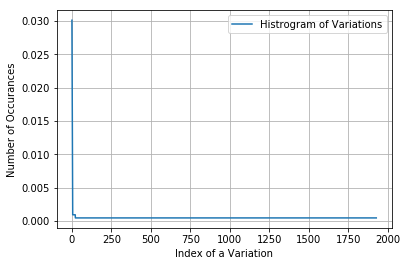

In [208]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.03013183 0.05367232 0.07485876 ... 0.99905838 0.99952919 1.        ]


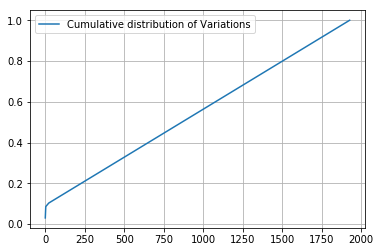

In [209]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [210]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [211]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [212]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [213]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1965)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7231701313897025
For values of alpha =  0.0001 The log loss is: 1.7110403616530323
For values of alpha =  0.001 The log loss is: 1.7148138160383877
For values of alpha =  0.01 The log loss is: 1.720647957446547
For values of alpha =  0.1 The log loss is: 1.7262802534224946
For values of alpha =  1 The log loss is: 1.731317410663227


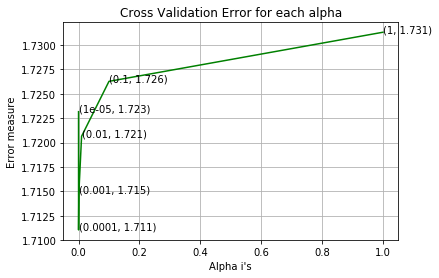

For values of best alpha =  0.0001 The train log loss is: 0.7042480819939961
For values of best alpha =  0.0001 The cross validation log loss is: 1.7110403616530323
For values of best alpha =  0.0001 The test log loss is: 1.7015737352854592


In [214]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [215]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1928  genes in test and cross validation data sets?
Ans
1. In test data 66 out of 665 : 9.924812030075188
2. In cross validation data 51 out of  532 : 9.586466165413533


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [216]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [217]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [218]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(max_features = 1000,min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [219]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [220]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [221]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [222]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [223]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [224]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({249.25818681231402: 1, 176.94788906069093: 1, 137.3350168851816: 1, 131.32020987596636: 1, 126.70419430742902: 1, 117.31300226730924: 1, 116.35535599631464: 1, 116.21896146302784: 1, 107.99718448231323: 1, 107.3237634011287: 1, 106.18121462178652: 1, 88.90994472369393: 1, 88.26458473269881: 1, 87.42072118943646: 1, 82.16243837637369: 1, 80.1920471491737: 1, 79.40935442697985: 1, 78.72934654580868: 1, 77.39705090121323: 1, 75.40446205581634: 1, 74.99652671876099: 1, 74.56542721562815: 1, 70.48090153677285: 1, 70.05383538763398: 1, 69.06547605738439: 1, 67.19693418453792: 1, 67.08196998527859: 1, 66.82627880919671: 1, 66.80632392752347: 1, 63.226257068820814: 1, 63.223695346217475: 1, 62.902165463196035: 1, 62.14767088924285: 1, 59.26040754547148: 1, 57.493677869834656: 1, 56.501630967409326: 1, 56.054406465466506: 1, 55.4158960138001: 1, 54.062504003060994: 1, 51.33701319390713: 1, 50.37484367011052: 1, 50.057524803351086: 1, 49.60889337267768: 1, 48.50754498045811: 1, 47.54149

For values of alpha =  1e-05 The log loss is: 1.148750990636421
For values of alpha =  0.0001 The log loss is: 1.1799131158447351
For values of alpha =  0.001 The log loss is: 1.4273187453204115
For values of alpha =  0.01 The log loss is: 1.8671095458618012
For values of alpha =  0.1 The log loss is: 2.0374555211108967
For values of alpha =  1 The log loss is: 2.0260663619117834


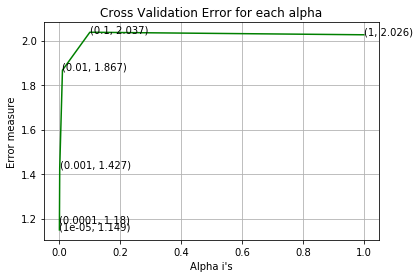

For values of best alpha =  1e-05 The train log loss is: 0.8048490307170281
For values of best alpha =  1e-05 The cross validation log loss is: 1.148750990636421
For values of best alpha =  1e-05 The test log loss is: 1.0239576039690927


In [225]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [226]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(max_features = 1000,min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [227]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

95.2 % of word of test data appeared in train data
92.4 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [228]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [229]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [230]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(max_features=1000,min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [231]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [232]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 3200)
(number of data points * number of features) in test data =  (665, 3200)
(number of data points * number of features) in cross validation data = (532, 3200)


In [233]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.2124916854730916
for alpha = 0.0001
Log Loss : 1.2120525269502955
for alpha = 0.001
Log Loss : 1.2106799153730616
for alpha = 0.1
Log Loss : 1.2263786958632021
for alpha = 1
Log Loss : 1.3100019899776518
for alpha = 10
Log Loss : 1.50886623984461
for alpha = 100
Log Loss : 1.469153837892789
for alpha = 1000
Log Loss : 1.4637513879908013


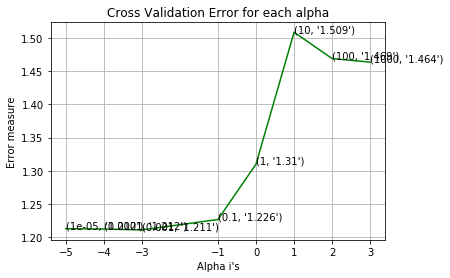

For values of best alpha =  0.001 The train log loss is: 0.5261403312693558
For values of best alpha =  0.001 The cross validation log loss is: 1.2106799153730616
For values of best alpha =  0.001 The test log loss is: 1.1428914713058833


In [234]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.3509235125982695
Number of missclassified point : 0.44360902255639095
-------------------- Confusion matrix --------------------


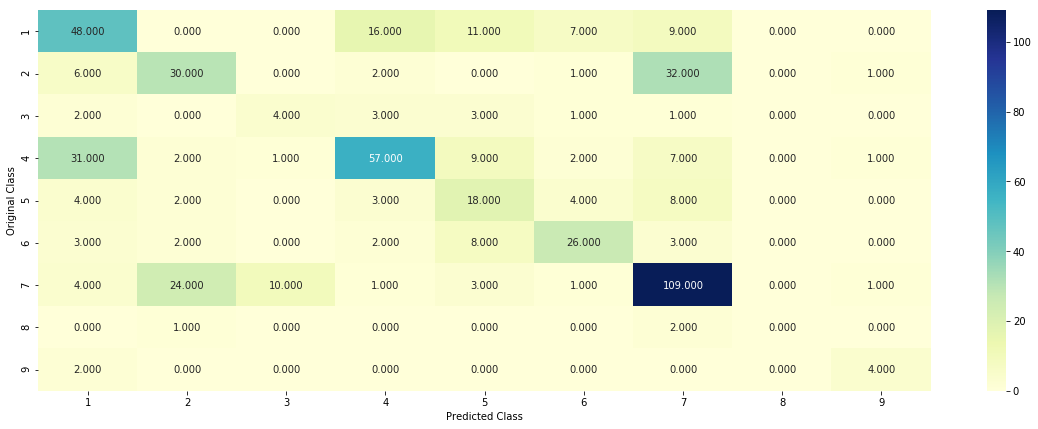

-------------------- Precision matrix (Columm Sum=1) --------------------


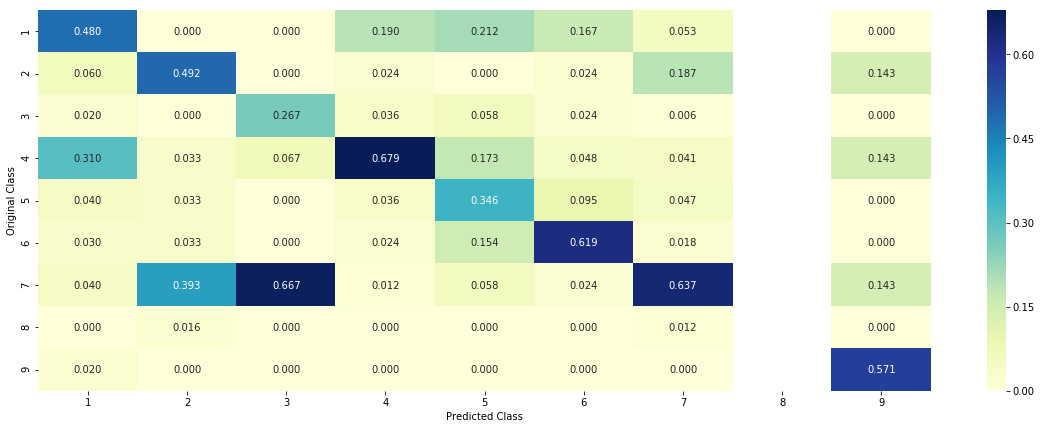

-------------------- Recall matrix (Row sum=1) --------------------


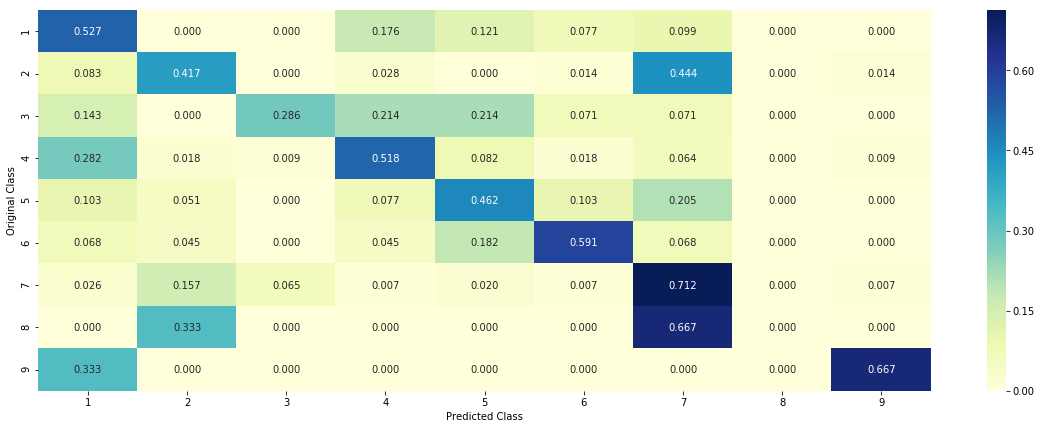

In [69]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [236]:
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0563 0.0417 0.0118 0.7382 0.0321 0.0305 0.0845 0.003  0.0019]]
Actual Class : 4
--------------------------------------------------
11 Text feature [activity] present in test data point [True]
12 Text feature [protein] present in test data point [True]
15 Text feature [function] present in test data point [True]
16 Text feature [proteins] present in test data point [True]
17 Text feature [missense] present in test data point [True]
18 Text feature [results] present in test data point [True]
19 Text feature [type] present in test data point [True]
20 Text feature [pten] present in test data point [True]
22 Text feature [shown] present in test data point [True]
23 Text feature [acid] present in test data point [True]
24 Text feature [important] present in test data point [True]
25 Text feature [functional] present in test data point [True]
26 Text feature [wild] present in test data point [True]
27 Text feature [whether] present in te

284 Text feature [100] present in test data point [True]
286 Text feature [13] present in test data point [True]
287 Text feature [induced] present in test data point [True]
288 Text feature [revealed] present in test data point [True]
291 Text feature [genetic] present in test data point [True]
297 Text feature [identified] present in test data point [True]
299 Text feature [ml] present in test data point [True]
300 Text feature [increased] present in test data point [True]
301 Text feature [system] present in test data point [True]
302 Text feature [nuclear] present in test data point [True]
304 Text feature [even] present in test data point [True]
305 Text feature [activities] present in test data point [True]
307 Text feature [33] present in test data point [True]
309 Text feature [obtained] present in test data point [True]
314 Text feature [model] present in test data point [True]
316 Text feature [cancer] present in test data point [True]
317 Text feature [decreased] present in 

615 Text feature [60] present in test data point [True]
616 Text feature [impact] present in test data point [True]
618 Text feature [www] present in test data point [True]
620 Text feature [mice] present in test data point [True]
629 Text feature [samples] present in test data point [True]
631 Text feature [exons] present in test data point [True]
632 Text feature [signal] present in test data point [True]
633 Text feature [per] present in test data point [True]
634 Text feature [decrease] present in test data point [True]
636 Text feature [14] present in test data point [True]
639 Text feature [sporadic] present in test data point [True]
640 Text feature [somatic] present in test data point [True]
643 Text feature [mutated] present in test data point [True]
644 Text feature [elevated] present in test data point [True]
645 Text feature [clinical] present in test data point [True]
646 Text feature [fraction] present in test data point [True]
648 Text feature [time] present in test data

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [237]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1558 0.0436 0.0119 0.631  0.0337 0.032  0.0869 0.0031 0.002 ]]
Actual Class : 1
--------------------------------------------------
11 Text feature [activity] present in test data point [True]
12 Text feature [protein] present in test data point [True]
15 Text feature [function] present in test data point [True]
16 Text feature [proteins] present in test data point [True]
17 Text feature [missense] present in test data point [True]
18 Text feature [results] present in test data point [True]
19 Text feature [type] present in test data point [True]
21 Text feature [experiments] present in test data point [True]
22 Text feature [shown] present in test data point [True]
23 Text feature [acid] present in test data point [True]
24 Text feature [important] present in test data point [True]
25 Text feature [functional] present in test data point [True]
26 Text feature [wild] present in test data point [True]
27 Text feature [whether] presen

275 Text feature [presence] present in test data point [True]
276 Text feature [residue] present in test data point [True]
277 Text feature [normal] present in test data point [True]
278 Text feature [region] present in test data point [True]
285 Text feature [membrane] present in test data point [True]
287 Text feature [induced] present in test data point [True]
290 Text feature [second] present in test data point [True]
294 Text feature [constructs] present in test data point [True]
297 Text feature [identified] present in test data point [True]
298 Text feature [growth] present in test data point [True]
300 Text feature [increased] present in test data point [True]
302 Text feature [nuclear] present in test data point [True]
303 Text feature [substitution] present in test data point [True]
305 Text feature [activities] present in test data point [True]
310 Text feature [consequences] present in test data point [True]
311 Text feature [carried] present in test data point [True]
312 T

725 Text feature [carcinoma] present in test data point [True]
726 Text feature [normalized] present in test data point [True]
751 Text feature [promote] present in test data point [True]
756 Text feature [factors] present in test data point [True]
761 Text feature [2002] present in test data point [True]
763 Text feature [smad4] present in test data point [True]
765 Text feature [helix] present in test data point [True]
769 Text feature [inhibited] present in test data point [True]
773 Text feature [end] present in test data point [True]
776 Text feature [treated] present in test data point [True]
777 Text feature [breast] present in test data point [True]
783 Text feature [overexpression] present in test data point [True]
790 Text feature [colorectal] present in test data point [True]
793 Text feature [activate] present in test data point [True]
800 Text feature [kinase] present in test data point [True]
801 Text feature [2003] present in test data point [True]
803 Text feature [tgf]

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0470822160366484
for alpha = 11
Log Loss : 1.0399928306605806
for alpha = 15
Log Loss : 1.0666871502746276
for alpha = 21
Log Loss : 1.0681299320767772
for alpha = 31
Log Loss : 1.0712092515441383
for alpha = 41
Log Loss : 1.0754482303366437
for alpha = 51
Log Loss : 1.0864093764174962
for alpha = 99
Log Loss : 1.1120814813174422


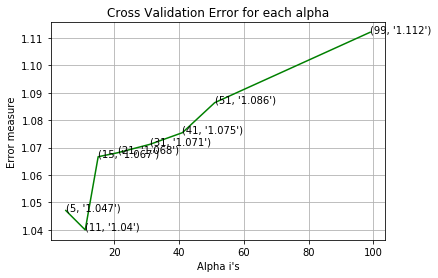

For values of best alpha =  11 The train log loss is: 0.6500392723689956
For values of best alpha =  11 The cross validation log loss is: 1.0399928306605806
For values of best alpha =  11 The test log loss is: 0.9835121342822057


In [238]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0399928306605806
Number of mis-classified points : 0.36278195488721804
-------------------- Confusion matrix --------------------


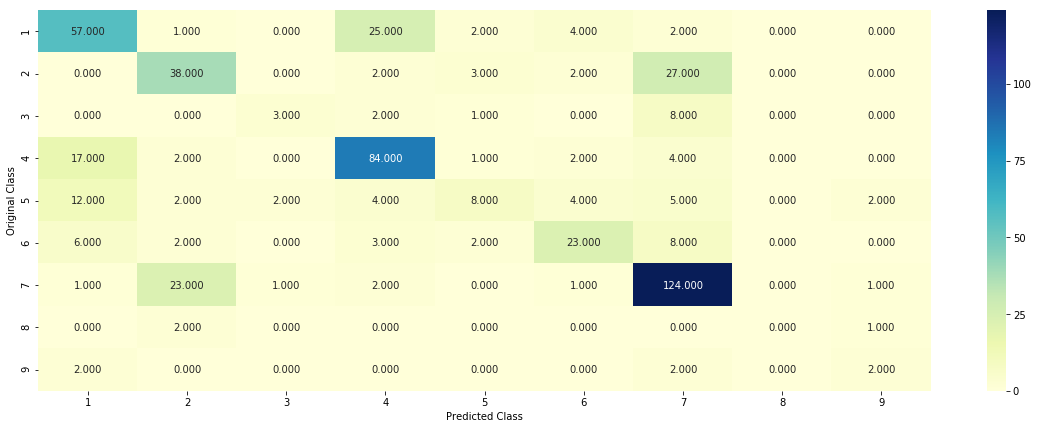

-------------------- Precision matrix (Columm Sum=1) --------------------


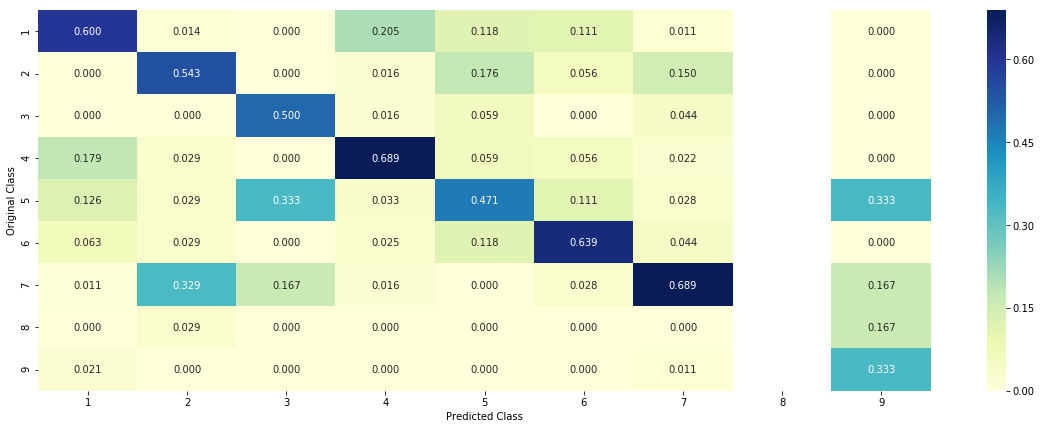

-------------------- Recall matrix (Row sum=1) --------------------


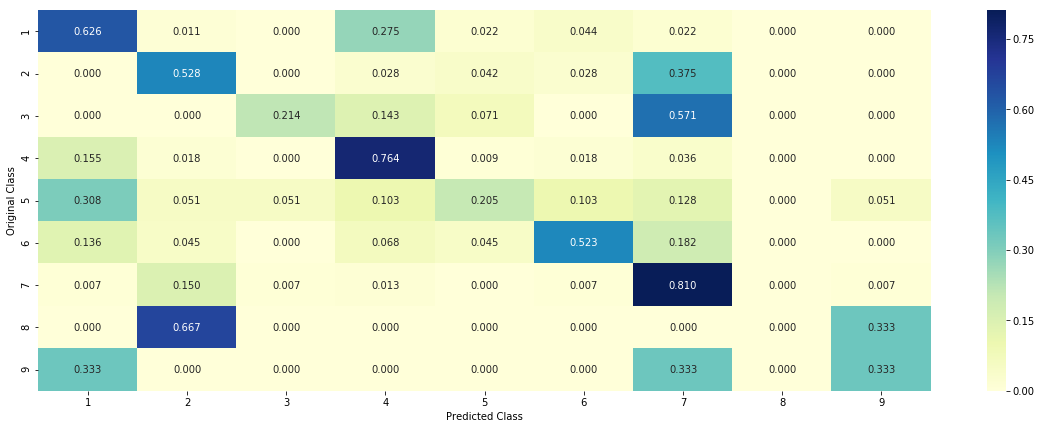

In [239]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [240]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 4
The  11  nearest neighbours of the test points belongs to classes [4 4 4 4 4 4 4 7 4 4 4]
Fequency of nearest points : Counter({4: 10, 7: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [242]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 105

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [7 7 7 7 7 7 7 7 2 7 7]
Fequency of nearest points : Counter({7: 10, 2: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2573299788549024
for alpha = 1e-05
Log Loss : 1.1612089458566022
for alpha = 0.0001
Log Loss : 1.0697848339167542
for alpha = 0.001
Log Loss : 1.0805896866264562
for alpha = 0.01
Log Loss : 1.2315884147204645
for alpha = 0.1
Log Loss : 1.7062598092283299
for alpha = 1
Log Loss : 1.8273471238086016
for alpha = 10
Log Loss : 1.8395211307318156
for alpha = 100
Log Loss : 1.840846253827411


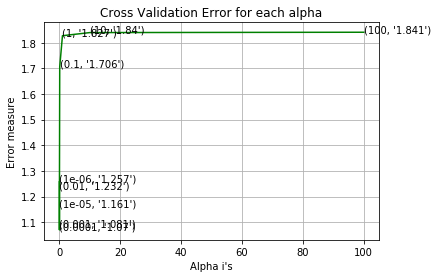

For values of best alpha =  0.0001 The train log loss is: 0.4472405130488467
For values of best alpha =  0.0001 The cross validation log loss is: 1.0697848339167542
For values of best alpha =  0.0001 The test log loss is: 0.923840342701383


In [245]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.0697848339167542
Number of mis-classified points : 0.3609022556390977
-------------------- Confusion matrix --------------------


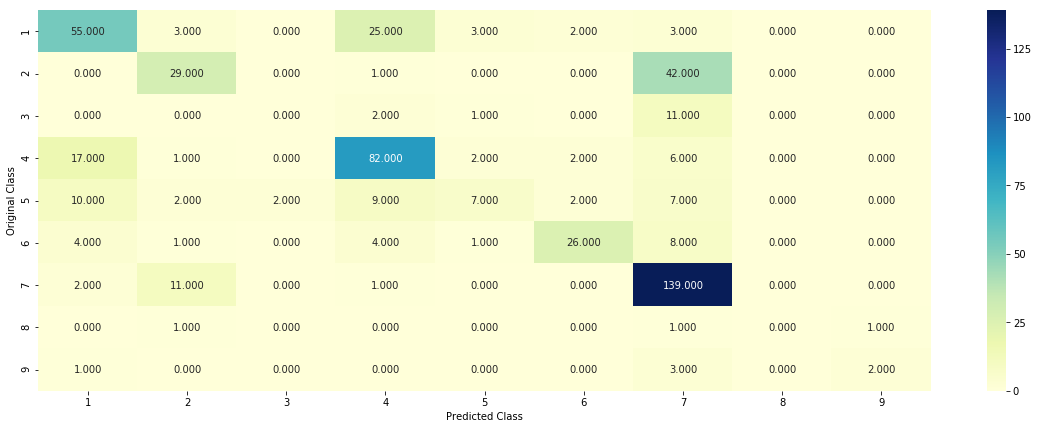

-------------------- Precision matrix (Columm Sum=1) --------------------


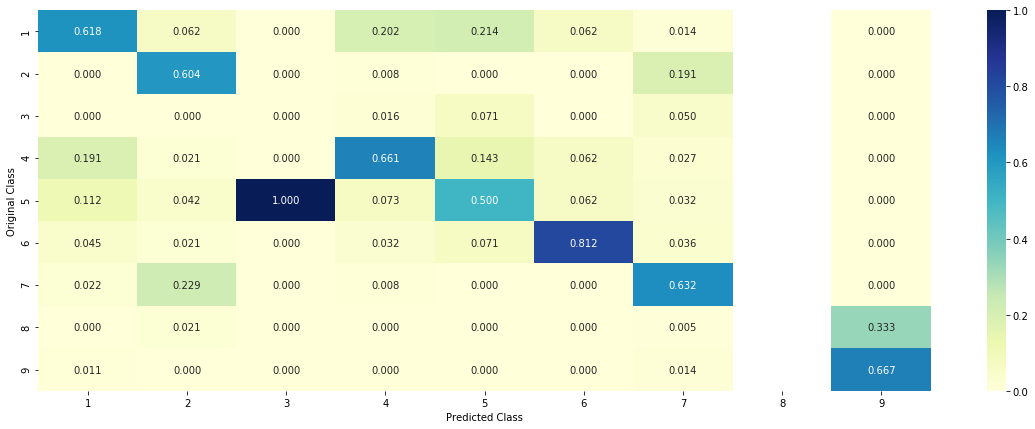

-------------------- Recall matrix (Row sum=1) --------------------


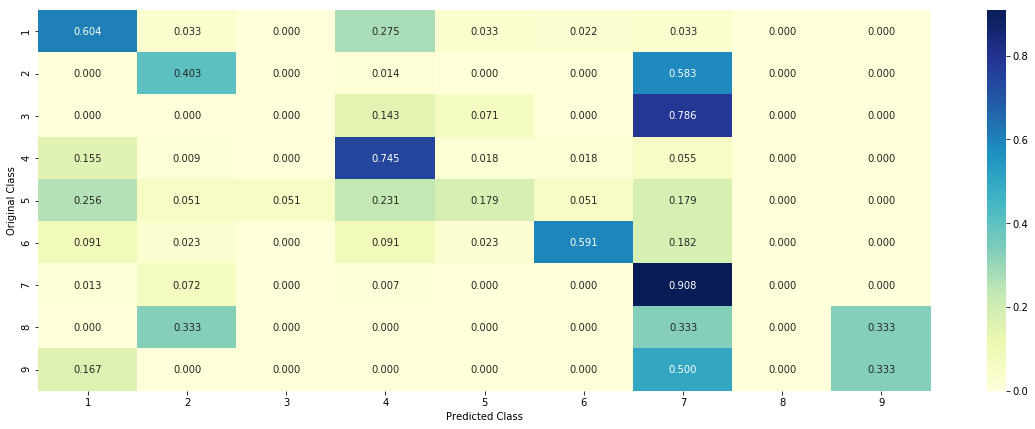

In [246]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [247]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [248]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0132 0.0056 0.0125 0.927  0.0069 0.0046 0.0251 0.0028 0.0023]]
Actual Class : 4
--------------------------------------------------
18 Text feature [suppressor] present in test data point [True]
89 Text feature [missense] present in test data point [True]
115 Text feature [right] present in test data point [True]
117 Text feature [suggesting] present in test data point [True]
157 Text feature [lanes] present in test data point [True]
167 Text feature [due] present in test data point [True]
192 Text feature [flag] present in test data point [True]
194 Text feature [dominant] present in test data point [True]
224 Text feature [phenotype] present in test data point [True]
233 Text feature [mice] present in test data point [True]
235 Text feature [reduced] present in test data point [True]
269 Text feature [western] present in test data point [True]
271 Text feature [direct] present in test data point [True]
276 Text feature [play] pres

830 Text feature [fig] present in test data point [True]
833 Text feature [test] present in test data point [True]
834 Text feature [amino] present in test data point [True]
839 Text feature [subjected] present in test data point [True]
841 Text feature [green] present in test data point [True]
842 Text feature [malignant] present in test data point [True]
845 Text feature [42] present in test data point [True]
846 Text feature [studied] present in test data point [True]
848 Text feature [associated] present in test data point [True]
851 Text feature [alterations] present in test data point [True]
852 Text feature [results] present in test data point [True]
856 Text feature [blood] present in test data point [True]
858 Text feature [impact] present in test data point [True]
860 Text feature [sporadic] present in test data point [True]
864 Text feature [cohort] present in test data point [True]
867 Text feature [cannot] present in test data point [True]
868 Text feature [atp] present in

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [249]:
test_point_index = 100
no_feature = 5000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2081 0.0101 0.0135 0.7173 0.0139 0.0135 0.0169 0.0038 0.0029]]
Actual Class : 1
--------------------------------------------------
18 Text feature [suppressor] present in test data point [True]
89 Text feature [missense] present in test data point [True]
157 Text feature [lanes] present in test data point [True]
167 Text feature [due] present in test data point [True]
179 Text feature [families] present in test data point [True]
186 Text feature [tumorigenesis] present in test data point [True]
192 Text feature [flag] present in test data point [True]
194 Text feature [dominant] present in test data point [True]
200 Text feature [liver] present in test data point [True]
235 Text feature [reduced] present in test data point [True]
258 Text feature [mammalian] present in test data point [True]
259 Text feature [deletion] present in test data point [True]
269 Text feature [western] present in test data point [True]
274 Text feature [s

978 Text feature [part] present in test data point [True]
988 Text feature [proliferation] present in test data point [True]
1005 Text feature [contact] present in test data point [True]
1016 Text feature [indicated] present in test data point [True]
1085 Text feature [measured] present in test data point [True]
1106 Text feature [sufficient] present in test data point [True]
1143 Text feature [60] present in test data point [True]
1147 Text feature [similar] present in test data point [True]
1222 Text feature [might] present in test data point [True]
1255 Text feature [development] present in test data point [True]
1282 Text feature [apoptosis] present in test data point [True]
1488 Text feature [without] present in test data point [True]
1575 Text feature [50] present in test data point [True]
1586 Text feature [six] present in test data point [True]
1587 Text feature [could] present in test data point [True]
1604 Text feature [another] present in test data point [True]
1605 Text fea

2879 Text feature [inhibitors] present in test data point [True]
2881 Text feature [many] present in test data point [True]
2884 Text feature [factor] present in test data point [True]
2886 Text feature [demonstrated] present in test data point [True]
2890 Text feature [differentiation] present in test data point [True]
2901 Text feature [tumors] present in test data point [True]
2906 Text feature [phosphorylated] present in test data point [True]
2909 Text feature [formation] present in test data point [True]
2912 Text feature [located] present in test data point [True]
2924 Text feature [mutant] present in test data point [True]
2926 Text feature [end] present in test data point [True]
2927 Text feature [normalized] present in test data point [True]
2930 Text feature [stimulated] present in test data point [True]
2931 Text feature [transforming] present in test data point [True]
2933 Text feature [position] present in test data point [True]
2935 Text feature [vivo] present in test da

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.229616452548897
for alpha = 1e-05
Log Loss : 1.223546560197277
for alpha = 0.0001
Log Loss : 1.1095533267013222
for alpha = 0.001
Log Loss : 1.1479587491146248
for alpha = 0.01
Log Loss : 1.3211186732304874
for alpha = 0.1
Log Loss : 1.6492446361561401
for alpha = 1
Log Loss : 1.7651410655674775


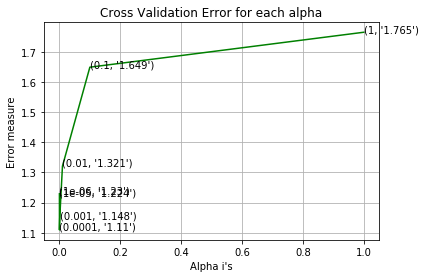

For values of best alpha =  0.0001 The train log loss is: 0.44102471844656876
For values of best alpha =  0.0001 The cross validation log loss is: 1.1095533267013222
For values of best alpha =  0.0001 The test log loss is: 0.9523338413522304


In [250]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1095533267013222
Number of mis-classified points : 0.3684210526315789
-------------------- Confusion matrix --------------------


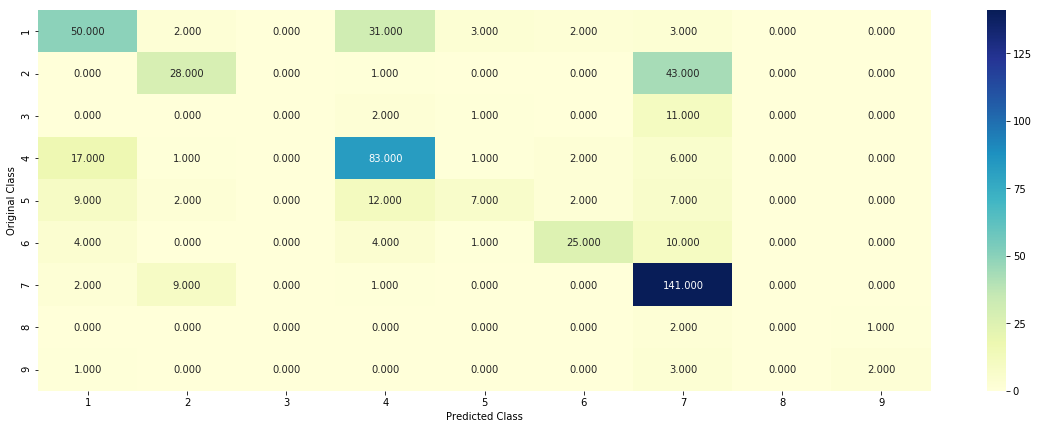

-------------------- Precision matrix (Columm Sum=1) --------------------


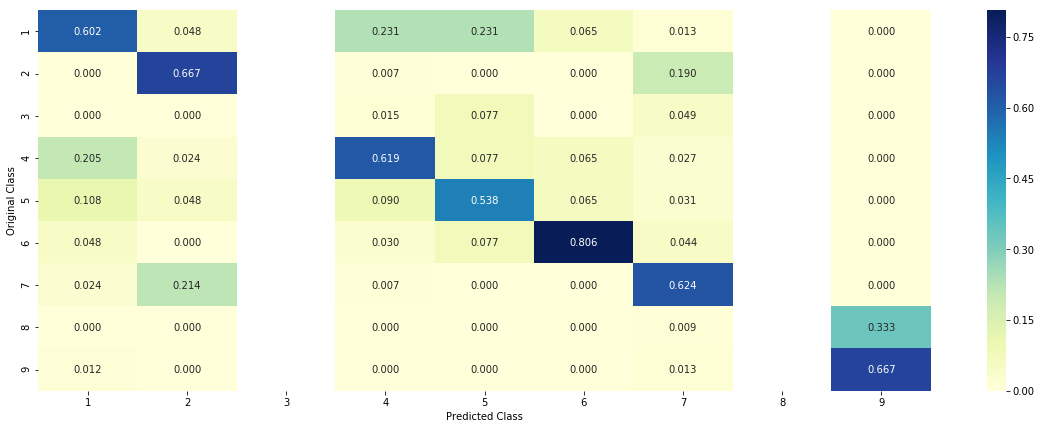

-------------------- Recall matrix (Row sum=1) --------------------


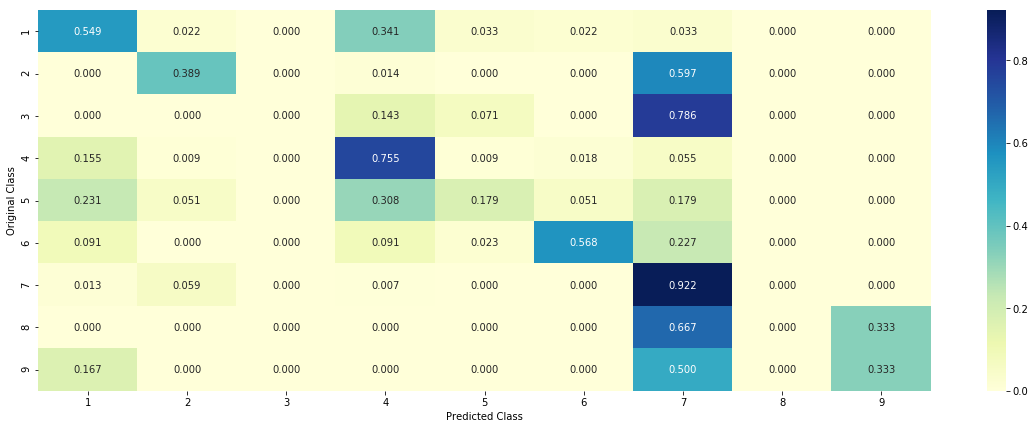

In [251]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [252]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.430e-02 5.800e-03 1.590e-02 9.176e-01 6.400e-03 4.300e-03 3.400e-02
  1.200e-03 6.000e-04]]
Actual Class : 4
--------------------------------------------------
37 Text feature [suppressor] present in test data point [True]
105 Text feature [suggesting] present in test data point [True]
111 Text feature [missense] present in test data point [True]
118 Text feature [right] present in test data point [True]
143 Text feature [lanes] present in test data point [True]
177 Text feature [due] present in test data point [True]
230 Text feature [flag] present in test data point [True]
231 Text feature [dominant] present in test data point [True]
233 Text feature [play] present in test data point [True]
244 Text feature [reduced] present in test data point [True]
267 Text feature [suggest] present in test data point [True]
272 Text feature [western] present in test data point [True]
274 Text feature [see] present in test data point [True]
278

838 Text feature [impact] present in test data point [True]
840 Text feature [subjected] present in test data point [True]
842 Text feature [test] present in test data point [True]
845 Text feature [hours] present in test data point [True]
847 Text feature [pathways] present in test data point [True]
848 Text feature [least] present in test data point [True]
849 Text feature [amplified] present in test data point [True]
850 Text feature [genomic] present in test data point [True]
851 Text feature [3a] present in test data point [True]
852 Text feature [fig] present in test data point [True]
854 Text feature [introduction] present in test data point [True]
855 Text feature [via] present in test data point [True]
860 Text feature [cannot] present in test data point [True]
861 Text feature [blood] present in test data point [True]
868 Text feature [28] present in test data point [True]
870 Text feature [atp] present in test data point [True]
871 Text feature [42] present in test data poin

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [253]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2121 0.0101 0.0088 0.7237 0.0131 0.0124 0.0169 0.0019 0.0009]]
Actual Class : 1
--------------------------------------------------
37 Text feature [suppressor] present in test data point [True]
111 Text feature [missense] present in test data point [True]
136 Text feature [liver] present in test data point [True]
143 Text feature [lanes] present in test data point [True]
177 Text feature [due] present in test data point [True]
204 Text feature [tumorigenesis] present in test data point [True]
230 Text feature [flag] present in test data point [True]
231 Text feature [dominant] present in test data point [True]
234 Text feature [smad4] present in test data point [True]
244 Text feature [reduced] present in test data point [True]
252 Text feature [families] present in test data point [True]
272 Text feature [western] present in test data point [True]
280 Text feature [functional] present in test data point [True]
284 Text feature [ma

981 Text feature [proliferation] present in test data point [True]
Out of the top  1000  features  183 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.211749346977332
for C = 0.0001
Log Loss : 1.1062660169438554
for C = 0.001
Log Loss : 1.0970708397941669
for C = 0.01
Log Loss : 1.364591779972023
for C = 0.1
Log Loss : 1.7336498713010107
for C = 1
Log Loss : 1.841109933247229
for C = 10
Log Loss : 1.8411098522912799
for C = 100
Log Loss : 1.841109877788849


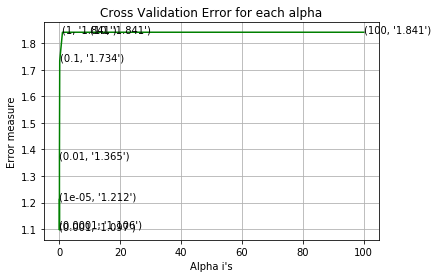

For values of best alpha =  0.001 The train log loss is: 0.5852589956860752
For values of best alpha =  0.001 The cross validation log loss is: 1.0970708397941669
For values of best alpha =  0.001 The test log loss is: 1.0043301962481346


In [255]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0970708397941669
Number of mis-classified points : 0.3458646616541353
-------------------- Confusion matrix --------------------


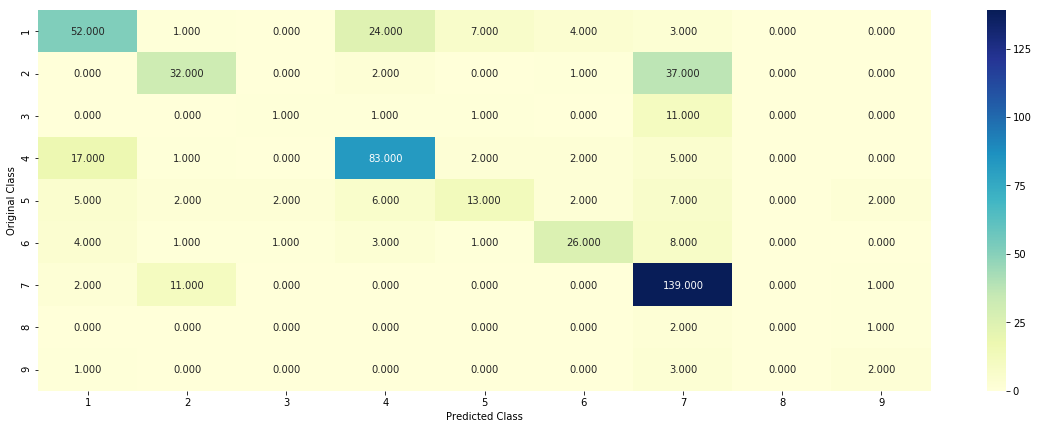

-------------------- Precision matrix (Columm Sum=1) --------------------


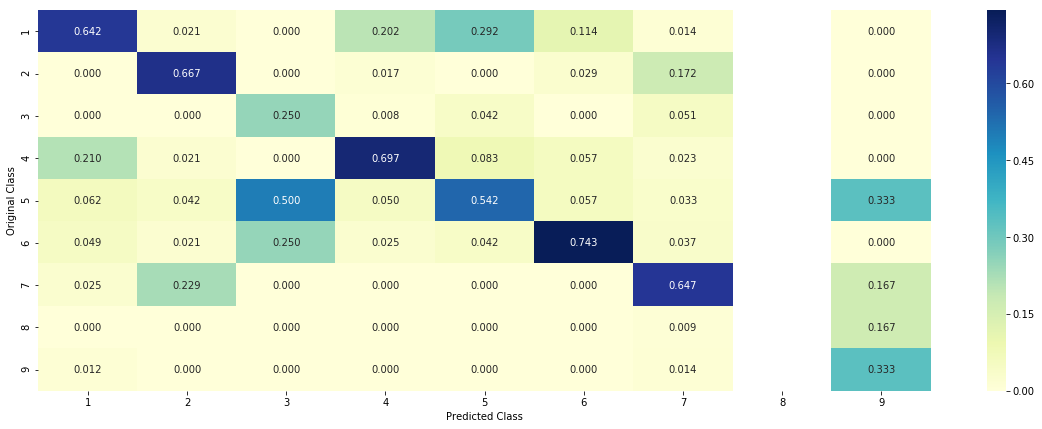

-------------------- Recall matrix (Row sum=1) --------------------


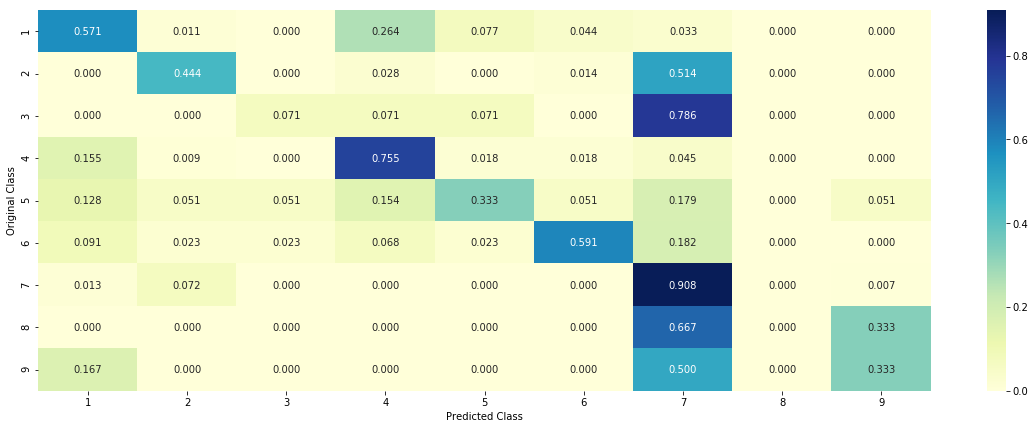

In [256]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [257]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0384 0.0221 0.0122 0.766  0.0199 0.0149 0.1216 0.0023 0.0026]]
Actual Class : 4
--------------------------------------------------
19 Text feature [suppressor] present in test data point [True]
24 Text feature [missense] present in test data point [True]
27 Text feature [suggesting] present in test data point [True]
28 Text feature [right] present in test data point [True]
29 Text feature [direct] present in test data point [True]
31 Text feature [flag] present in test data point [True]
32 Text feature [lanes] present in test data point [True]
34 Text feature [due] present in test data point [True]
35 Text feature [proportion] present in test data point [True]
41 Text feature [show] present in test data point [True]
255 Text feature [germline] present in test data point [True]
256 Text feature [stably] present in test data point [True]
258 Text feature [comparison] present in test data point [True]
259 Text feature [mice] present i

727 Text feature [used] present in test data point [True]
729 Text feature [exons] present in test data point [True]
730 Text feature [lines] present in test data point [True]
732 Text feature [genomic] present in test data point [True]
735 Text feature [relative] present in test data point [True]
736 Text feature [indeed] present in test data point [True]
738 Text feature [buffer] present in test data point [True]
739 Text feature [proteins] present in test data point [True]
741 Text feature [research] present in test data point [True]
742 Text feature [assay] present in test data point [True]
747 Text feature [lead] present in test data point [True]
748 Text feature [affected] present in test data point [True]
750 Text feature [blot] present in test data point [True]
752 Text feature [analyzed] present in test data point [True]
753 Text feature [31] present in test data point [True]
754 Text feature [alterations] present in test data point [True]
756 Text feature [syndrome] present i

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [258]:
test_point_index = 100
no_feature =1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1645 0.0414 0.0245 0.6386 0.0259 0.0257 0.0719 0.0051 0.0024]]
Actual Class : 1
--------------------------------------------------
19 Text feature [suppressor] present in test data point [True]
24 Text feature [missense] present in test data point [True]
31 Text feature [flag] present in test data point [True]
32 Text feature [lanes] present in test data point [True]
34 Text feature [due] present in test data point [True]
37 Text feature [tumorigenesis] present in test data point [True]
255 Text feature [germline] present in test data point [True]
257 Text feature [1998] present in test data point [True]
260 Text feature [families] present in test data point [True]
261 Text feature [mammalian] present in test data point [True]
262 Text feature [western] present in test data point [True]
344 Text feature [transfected] present in test data point [True]
345 Text feature [smad4] present in test data point [True]
346 Text feature [reduc

787 Text feature [levels] present in test data point [True]
789 Text feature [neutral] present in test data point [True]
791 Text feature [mutation] present in test data point [True]
792 Text feature [whereas] present in test data point [True]
793 Text feature [48] present in test data point [True]
796 Text feature [including] present in test data point [True]
798 Text feature [biological] present in test data point [True]
800 Text feature [90] present in test data point [True]
802 Text feature [bound] present in test data point [True]
803 Text feature [several] present in test data point [True]
805 Text feature [group] present in test data point [True]
807 Text feature [anti] present in test data point [True]
810 Text feature [led] present in test data point [True]
816 Text feature [effect] present in test data point [True]
823 Text feature [least] present in test data point [True]
824 Text feature [inhibited] present in test data point [True]
828 Text feature [finding] present in tes

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [259]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2617533227550406
for n_estimators = 100 and max depth =  10
Log Loss : 1.2677898402470533
for n_estimators = 200 and max depth =  5
Log Loss : 1.2507056140571386
for n_estimators = 200 and max depth =  10
Log Loss : 1.2595669384468542
for n_estimators = 500 and max depth =  5
Log Loss : 1.2409268392873736
for n_estimators = 500 and max depth =  10
Log Loss : 1.2500210086674584
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2347724500480501
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2481507685432582
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2338557657799185
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2490606710097445
For values of best estimator =  2000 The train log loss is: 0.8779870034714718
For values of best estimator =  2000 The cross validation log loss is: 1.2338557657799185
For values of best estimator =  2000 The test log loss is: 1.1629955256895583


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.2338557657799185
Number of mis-classified points : 0.4492481203007519
-------------------- Confusion matrix --------------------


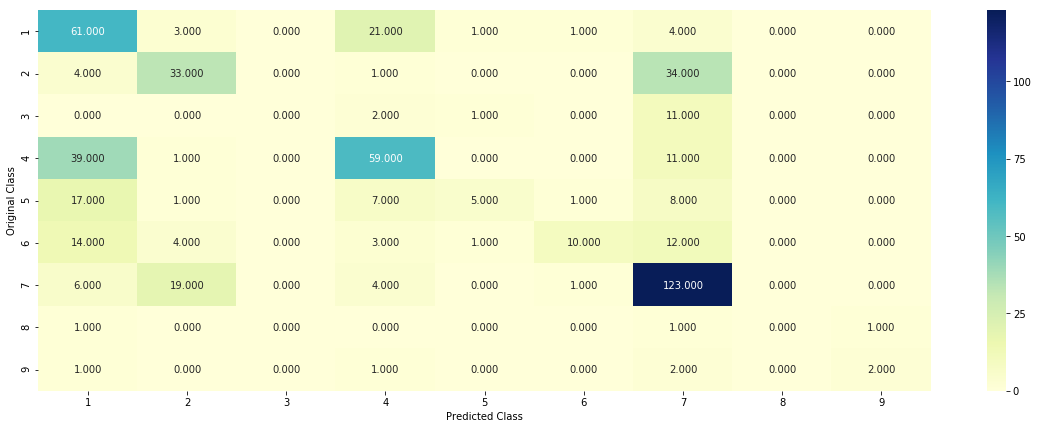

-------------------- Precision matrix (Columm Sum=1) --------------------


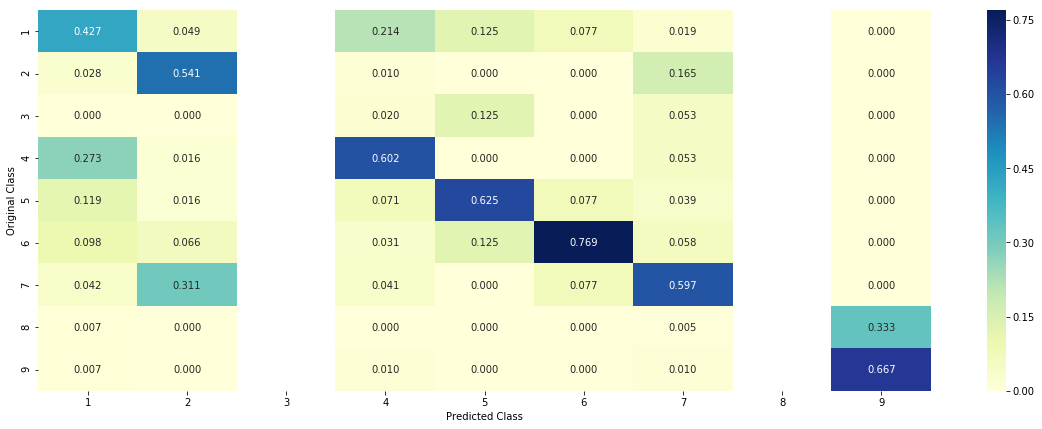

-------------------- Recall matrix (Row sum=1) --------------------


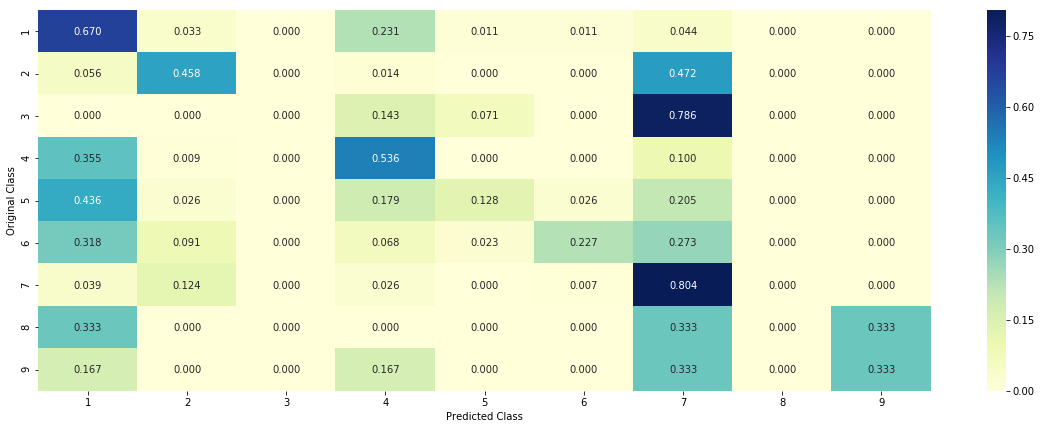

In [260]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [261]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1249 0.0717 0.0296 0.4736 0.0564 0.0493 0.1813 0.0066 0.0065]]
Actual Class : 4
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
3 Text feature [activation] present in test data point [True]
4 Text feature [suppressor] present in test data point [True]
5 Text feature [inhibitors] present in test data point [True]
6 Text feature [activated] present in test data point [True]
7 Text feature [function] present in test data point [True]
10 Text feature [inhibitor] present in test data point [True]
11 Text feature [missense] present in test data point [True]
13 Text feature [loss] present in test data point [True]
14 Text feature [treatment] present in test data point [True]
15 Text feature [erk] present in test data point [True]
19 Text feature [pathogenic] present in test data point [True]
25 Text feature [pten] present in test data point [True]
27 Text feature [deleterious] p

289 Text feature [mutations] present in test data point [True]
290 Text feature [molecular] present in test data point [True]
292 Text feature [11] present in test data point [True]
293 Text feature [possible] present in test data point [True]
295 Text feature [recently] present in test data point [True]
298 Text feature [17] present in test data point [True]
299 Text feature [culture] present in test data point [True]
302 Text feature [significantly] present in test data point [True]
306 Text feature [analysis] present in test data point [True]
308 Text feature [hypothesis] present in test data point [True]
313 Text feature [3a] present in test data point [True]
316 Text feature [60] present in test data point [True]
317 Text feature [developed] present in test data point [True]
321 Text feature [used] present in test data point [True]
322 Text feature [therefore] present in test data point [True]
324 Text feature [tissue] present in test data point [True]
326 Text feature [37] presen

571 Text feature [together] present in test data point [True]
572 Text feature [major] present in test data point [True]
574 Text feature [carrying] present in test data point [True]
578 Text feature [mechanisms] present in test data point [True]
579 Text feature [per] present in test data point [True]
581 Text feature [cannot] present in test data point [True]
583 Text feature [system] present in test data point [True]
586 Text feature [complete] present in test data point [True]
587 Text feature [cellular] present in test data point [True]
588 Text feature [degradation] present in test data point [True]
590 Text feature [mm] present in test data point [True]
591 Text feature [either] present in test data point [True]
595 Text feature [genomic] present in test data point [True]
597 Text feature [criteria] present in test data point [True]
602 Text feature [syndrome] present in test data point [True]
605 Text feature [long] present in test data point [True]
607 Text feature [involving]

962 Text feature [whole] present in test data point [True]
999 Text feature [lymphoma] present in test data point [True]
Out of the top  1000  features  455 are present in query point


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [262]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2658 0.0453 0.0194 0.4364 0.0531 0.0489 0.1171 0.0073 0.0067]]
Actuall Class : 1
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
3 Text feature [activation] present in test data point [True]
4 Text feature [suppressor] present in test data point [True]
5 Text feature [inhibitors] present in test data point [True]
6 Text feature [activated] present in test data point [True]
7 Text feature [function] present in test data point [True]
11 Text feature [missense] present in test data point [True]
13 Text feature [loss] present in test data point [True]
14 Text feature [treatment] present in test data point [True]
16 Text feature [transforming] present in test data point [True]
21 Text feature [growth] present in test data point [True]
22 Text feature [receptor] present in test data point [True]
29 Text feature [protein] present in test data point [True]
30 Text feature [consti

412 Text feature [different] present in test data point [True]
413 Text feature [due] present in test data point [True]
417 Text feature [stimulated] present in test data point [True]
418 Text feature [showed] present in test data point [True]
419 Text feature [complex] present in test data point [True]
420 Text feature [members] present in test data point [True]
422 Text feature [mutagenesis] present in test data point [True]
426 Text feature [discussion] present in test data point [True]
429 Text feature [al] present in test data point [True]
432 Text feature [acid] present in test data point [True]
433 Text feature [form] present in test data point [True]
438 Text feature [occur] present in test data point [True]
443 Text feature [basal] present in test data point [True]
444 Text feature [dominant] present in test data point [True]
445 Text feature [associated] present in test data point [True]
447 Text feature [findings] present in test data point [True]
448 Text feature [page] pre

755 Text feature [hydrogen] present in test data point [True]
756 Text feature [tgf] present in test data point [True]
759 Text feature [2000] present in test data point [True]
760 Text feature [derived] present in test data point [True]
761 Text feature [since] present in test data point [True]
765 Text feature [sufficient] present in test data point [True]
766 Text feature [gst] present in test data point [True]
769 Text feature [position] present in test data point [True]
770 Text feature [applied] present in test data point [True]
777 Text feature [p21] present in test data point [True]
781 Text feature [sds] present in test data point [True]
782 Text feature [followed] present in test data point [True]
783 Text feature [upon] present in test data point [True]
788 Text feature [factors] present in test data point [True]
790 Text feature [part] present in test data point [True]
796 Text feature [tumorigenesis] present in test data point [True]
797 Text feature [size] present in test

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [263]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.1895959133756686
for n_estimators = 10 and max depth =  3
Log Loss : 1.6084889886524703
for n_estimators = 10 and max depth =  5
Log Loss : 1.5036769157053271
for n_estimators = 10 and max depth =  10
Log Loss : 1.6298985394357486
for n_estimators = 50 and max depth =  2
Log Loss : 1.8390658025579905
for n_estimators = 50 and max depth =  3
Log Loss : 1.520585121777144
for n_estimators = 50 and max depth =  5
Log Loss : 1.309920480885714
for n_estimators = 50 and max depth =  10
Log Loss : 1.614453006246426
for n_estimators = 100 and max depth =  2
Log Loss : 1.6258274226320277
for n_estimators = 100 and max depth =  3
Log Loss : 1.4940067268674646
for n_estimators = 100 and max depth =  5
Log Loss : 1.2100233173816997
for n_estimators = 100 and max depth =  10
Log Loss : 1.6740525658717225
for n_estimators = 200 and max depth =  2
Log Loss : 1.7004462847291089
for n_estimators = 200 and max depth =  3
Log Loss : 1.5059626102466777


<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.2100233173816997
Number of mis-classified points : 0.40225563909774437
-------------------- Confusion matrix --------------------


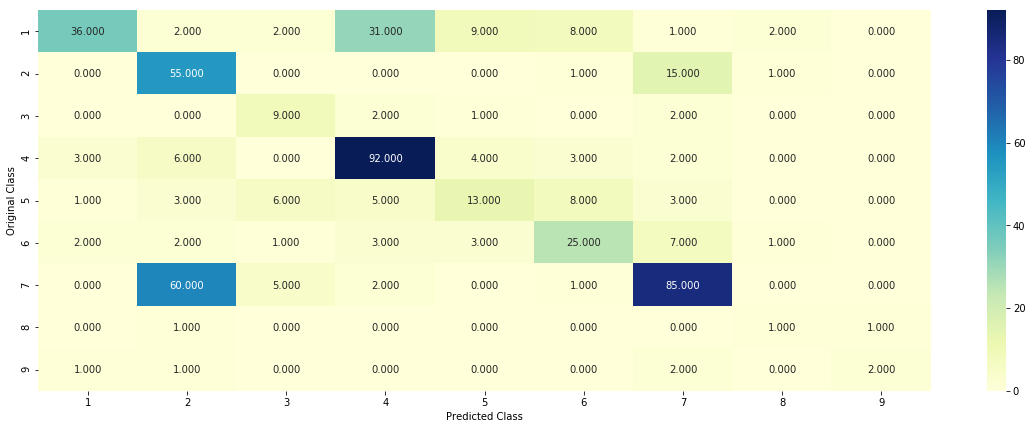

-------------------- Precision matrix (Columm Sum=1) --------------------


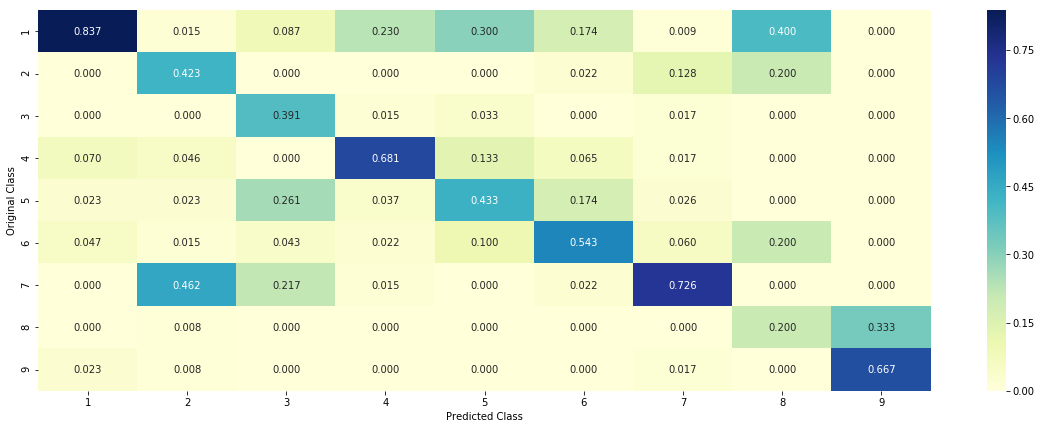

-------------------- Recall matrix (Row sum=1) --------------------


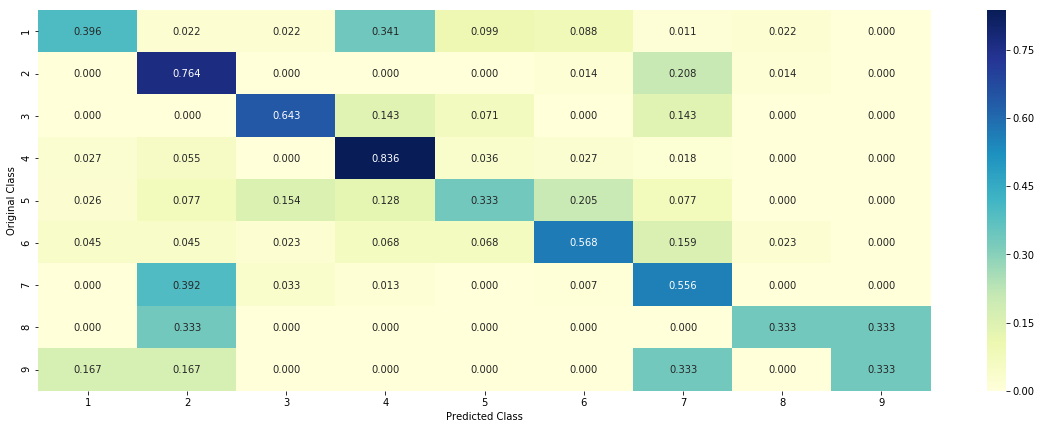

In [264]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [267]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.0467 0.0249 0.3378 0.4993 0.0086 0.0208 0.0095 0.0237 0.0288]]
Actual Class : 4
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [268]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.2103 0.0167 0.1255 0.4805 0.0286 0.0999 0.0083 0.0144 0.0159]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [269]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.08
Support vector machines : Log Loss: 1.84
Naive Bayes : Log Loss: 1.21
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.031
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.500
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.166
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.378
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.800


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.5444778395577321
Log loss (CV) on the stacking classifier : 1.1664760905643303
Log loss (test) on the stacking classifier : 1.1143784903828993
Number of missclassified point : 0.3609022556390977
-------------------- Confusion matrix --------------------


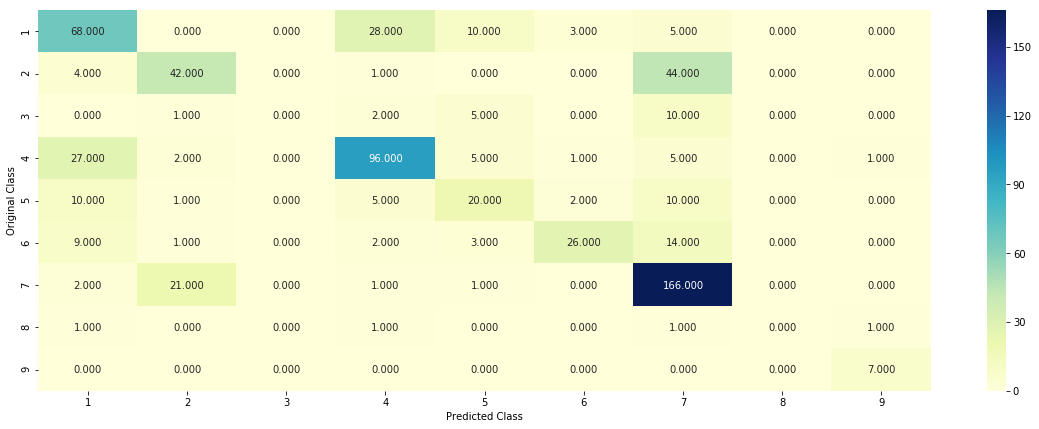

-------------------- Precision matrix (Columm Sum=1) --------------------


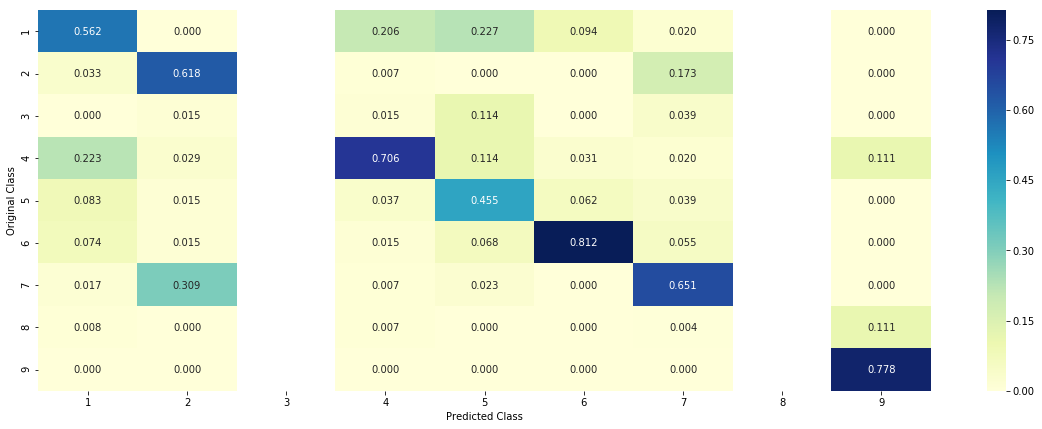

-------------------- Recall matrix (Row sum=1) --------------------


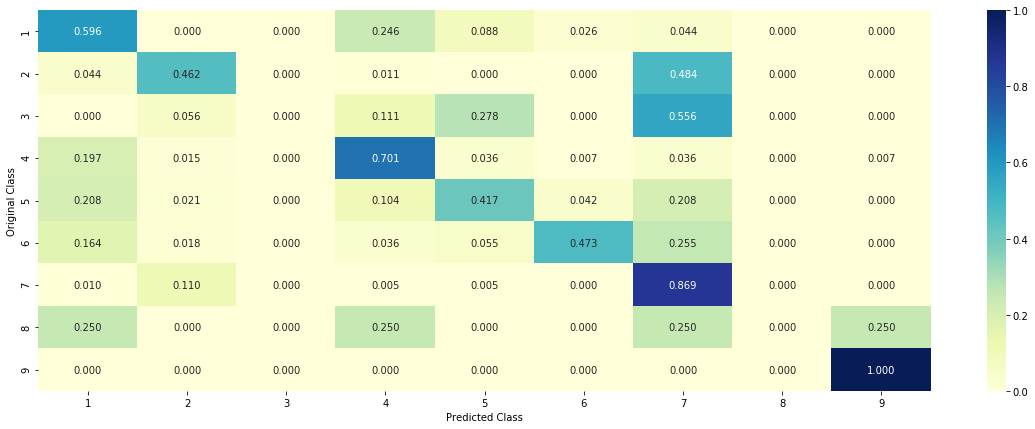

In [270]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.83492291034833
Log loss (CV) on the VotingClassifier : 1.213276637836091
Log loss (test) on the VotingClassifier : 1.1509826641959164
Number of missclassified point : 0.362406015037594
-------------------- Confusion matrix --------------------


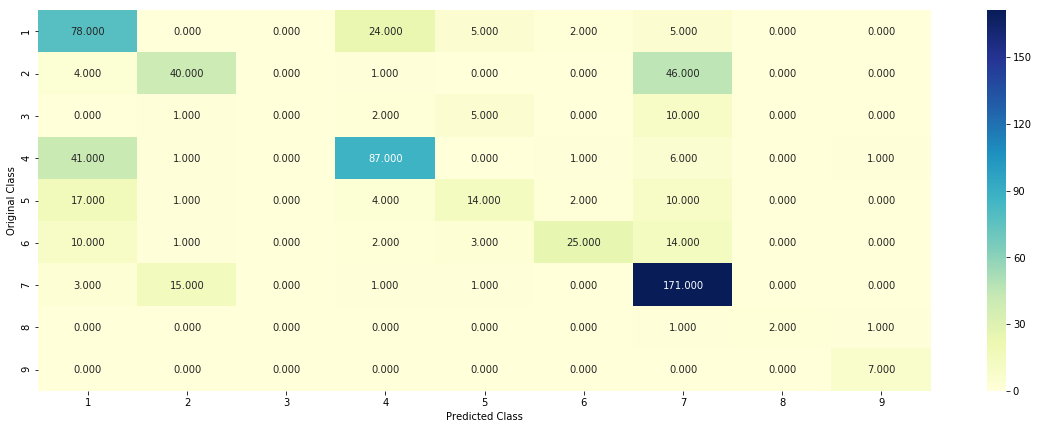

-------------------- Precision matrix (Columm Sum=1) --------------------


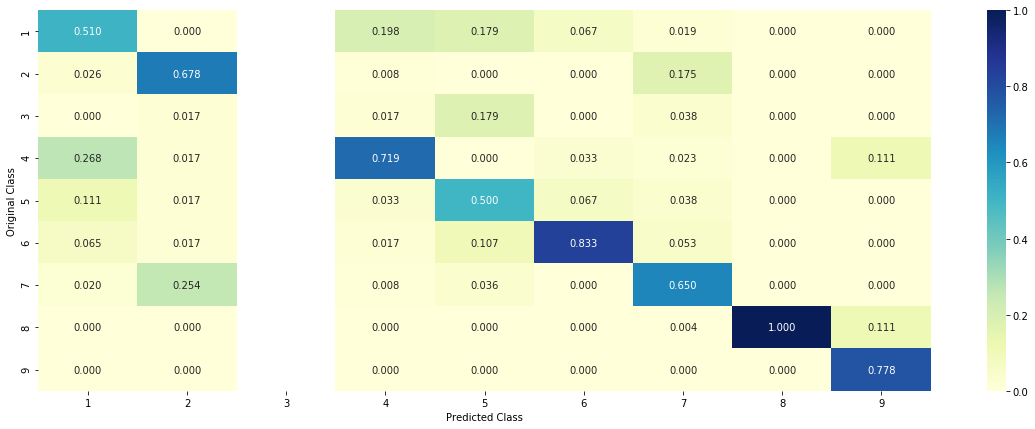

-------------------- Recall matrix (Row sum=1) --------------------


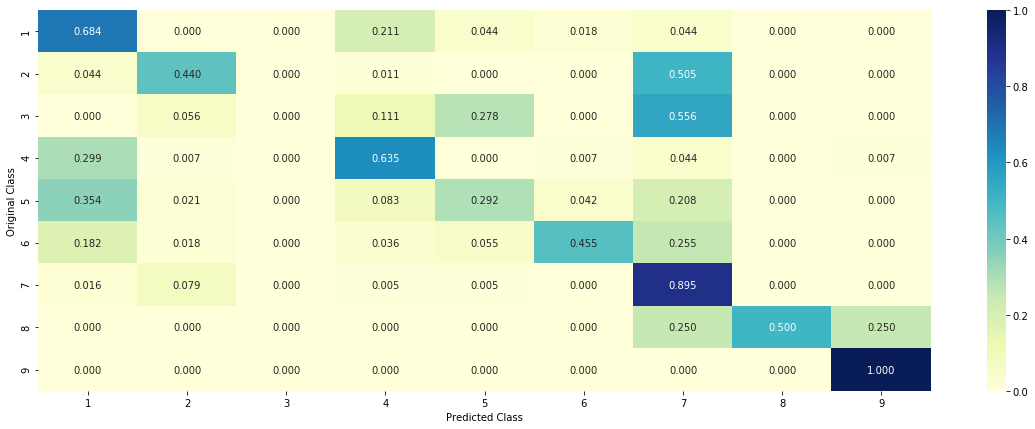

In [271]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

# Logistic Regression(CountVectorizer with Unigram and Bigram)

In [304]:

train_variation=train_df['Variation'].values
test_variation=test_df['Variation'].values
cv_variation=cv_df['Variation'].values
train_gene=train_df['Gene'].values
test_gene=test_df['Gene'].values
cv_gene=cv_df['Gene'].values
train_text=train_df['TEXT'].values
test_text=test_df['TEXT'].values
cv_text=cv_df['TEXT'].values


text_vectorizer=CountVectorizer(ngram_range=(1, 2))
train_variation=text_vectorizer.fit_transform(train_variation)
test_variation=text_vectorizer.transform(test_variation)
cv_variation=text_vectorizer.transform(cv_variation)

train_gene=text_vectorizer.fit_transform(train_gene)
test_gene=text_vectorizer.transform(test_gene)
cv_gene=text_vectorizer.transform(cv_gene)

text_vectorizer=CountVectorizer(min_df=10,ngram_range=(1,2))
train_variation=normalize(train_variation,axis=0)
test_variation=normalize(test_variation,axis=0)
cv_variation=normalize(cv_variation,axis=0)
train_gene=normalize(train_gene,axis=0)
test_gene=normalize(test_gene,axis=0)
cv_gene=normalize(cv_gene,axis=0)
print(train_gene.shape)
print(train_gene[1,:])
print(train_variation.shape)
print(train_variation[100,:])


train_text=text_vectorizer.fit_transform(train_text)
test_text=text_vectorizer.transform(test_text)
cv_text=text_vectorizer.transform(cv_text)
train_text=normalize(train_text,axis=0)
test_text=normalize(test_text,axis=0)
cv_text=normalize(cv_text,axis=0)
print(train_text.shape)


(2124, 235)
  (0, 194)	0.2581988897471611
(2124, 2065)
  (0, 104)	0.1414213562373095
(2124, 225052)


In [312]:
# hstacking the train,test, and CV Data

train_data=hstack([train_variation,train_gene,train_text]).tocsr()
cv_data=hstack([cv_variation,cv_gene,cv_text]).tocsr()
test_data=hstack([test_variation,test_gene,test_text]).tocsr()


for alpha = 1e-06
Log Loss : 1.5356606542957567
for alpha = 1e-05
Log Loss : 1.5281435501820149
for alpha = 0.0001
Log Loss : 1.525671117661709
for alpha = 0.001
Log Loss : 1.3664457624226665
for alpha = 0.01
Log Loss : 1.1664031876485257
for alpha = 0.1
Log Loss : 1.3417879354578617
for alpha = 1
Log Loss : 1.5529809872270768
for alpha = 10
Log Loss : 1.6156199655139774
for alpha = 100
Log Loss : 1.625070451862977


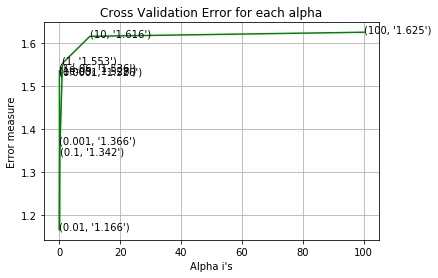

For values of best alpha =  0.01 The train log loss is: 0.8648003915897353
For values of best alpha =  0.01 The cross validation log loss is: 1.1664031876485257
For values of best alpha =  0.01 The test log loss is: 1.065964635372382


In [314]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_data, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_data, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_data)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_data, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_data, train_y)

predict_y = sig_clf.predict_proba(train_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_data)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1664031876485257
Number of mis-classified points : 0.40225563909774437
-------------------- Confusion matrix --------------------


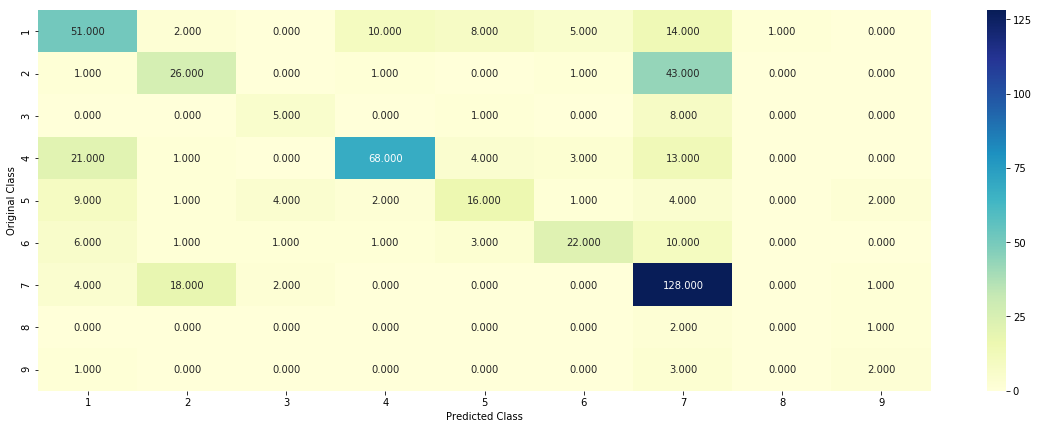

-------------------- Precision matrix (Columm Sum=1) --------------------


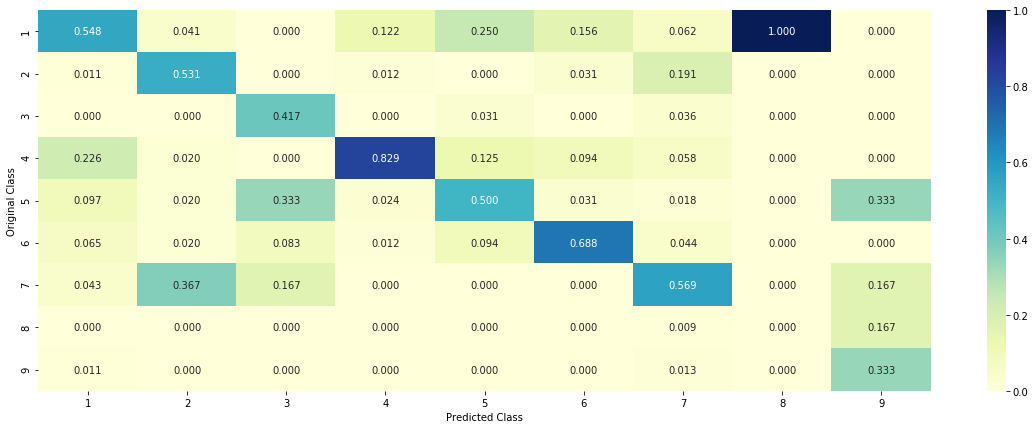

-------------------- Recall matrix (Row sum=1) --------------------


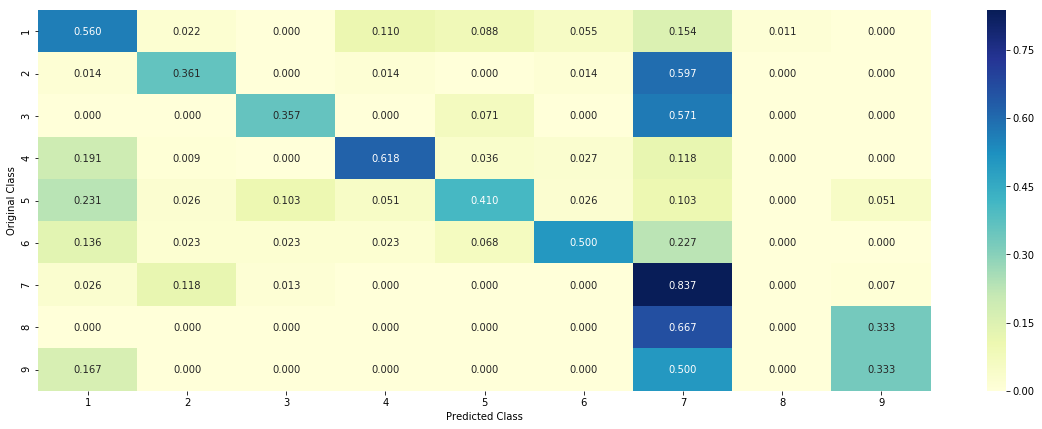

In [318]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_data, train_y, cv_data, cv_y, clf)


# Feature Engineering


In [371]:
#Code from Above Cells

result = pd.merge(data, data_text,on='ID', how='left')
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')


x_train, x_test, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)

################################################################

alpha = 1

# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", x_train))

# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", x_test))

# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", x_cv))

################################################################
#FOR GENE FEATURE

gene_vectorizer = TfidfVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(x_train['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(x_test['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(x_cv['Gene'])


In [372]:
#FOR VARIATION FEATURE
#Code FRom Above cells

#################################################################
alpha = 1

# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", x_train))

# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", x_test))

# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", x_cv))

#################################################################

vectorizer = TfidfVectorizer()
train_variation_feature_onehotCoding = vectorizer.fit_transform(x_train['Variation'])
test_variation_feature_onehotCoding = vectorizer.transform(x_test['Variation'])
cv_variation_feature_onehotCoding = vectorizer.transform(x_cv['Variation'])

In [373]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary


import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [374]:
# For Text Feature


text_vectorizer = TfidfVectorizer()
train_text_feature_onehotCoding = text_vectorizer.fit_transform(x_train['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total number of unique words in train data :", len(train_text_features))

test_text_feature_onehotCoding = text_vectorizer.transform(x_test['TEXT'])
cv_text_feature_onehotCoding = text_vectorizer.transform(x_cv['TEXT'])
################################################################

train_text_feature_responseCoding  = get_text_responsecoding(x_train)
test_text_feature_responseCoding  = get_text_responsecoding(x_test)
cv_text_feature_responseCoding  = get_text_responsecoding(x_cv)

# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T


Total number of unique words in train data : 123837


In [375]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = x_train[x_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(x_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [376]:
gene_variation = []

for gene in data['Gene'].values:
    gene_variation.append(gene)

for variation in data['Variation'].values:
    gene_variation.append(variation)
    

    
tfidfVectorizer = TfidfVectorizer(max_features=1000)
text2 = tfidfVectorizer.fit_transform(gene_variation)
gene_variation_features = tfidfVectorizer.get_feature_names()

train_text = tfidfVectorizer.transform(x_train['TEXT'])
test_text = tfidfVectorizer.transform(x_test['TEXT'])
cv_text = tfidfVectorizer.transform(x_cv['TEXT'])

In [377]:
train_x_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding, train_text,train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(x_train['Class']))

test_x_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding, test_text,test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(x_test['Class']))

cv_x_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding, cv_text,cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(x_cv['Class']))

In [378]:
train_x_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding,train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding,test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding,cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

In [379]:

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 127018)
(number of data points * number of features) in test data =  (665, 127018)
(number of data points * number of features) in cross validation data = (532, 127018)
 Response encoding features :
(number of data points * number of features) in train data =  (2124, 45)
(number of data points * number of features) in test data =  (665, 45)
(number of data points * number of features) in cross validation data = (532, 45)


for alpha = 1e-06
Log Loss : 1.0869811936135794
for alpha = 1e-05
Log Loss : 1.0576362421467183
for alpha = 0.0001
Log Loss : 0.9685179670267624
for alpha = 0.001
Log Loss : 1.0369882810140187
for alpha = 0.01
Log Loss : 1.257802448842145
for alpha = 0.1
Log Loss : 1.6169754533282263
for alpha = 1
Log Loss : 1.7166560080012416
for alpha = 10
Log Loss : 1.726842098165162


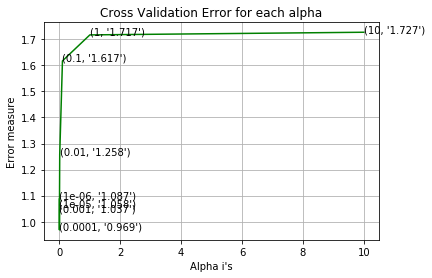

For values of best alpha =  0.0001 The train log loss is: 0.4479771216080555
For values of best alpha =  0.0001 The cross validation log loss is: 0.9882759278855332
For values of best alpha =  0.0001 The test log loss is: 1.0031279664365167


In [380]:
alpha = [10 ** x for x in range(-6, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log',)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', 
      alpha[best_alpha], "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.9881741288777217
Number of mis-classified points : 0.3157894736842105
-------------------- Confusion matrix --------------------


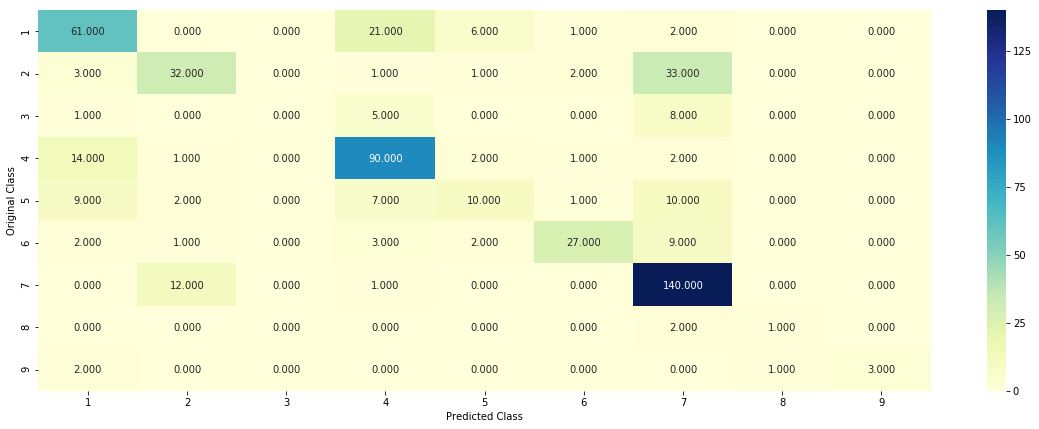

-------------------- Precision matrix (Columm Sum=1) --------------------


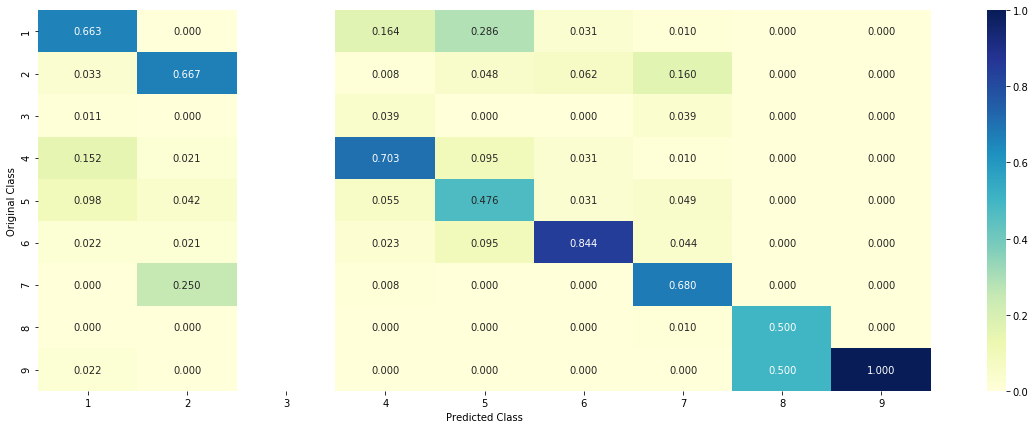

-------------------- Recall matrix (Row sum=1) --------------------


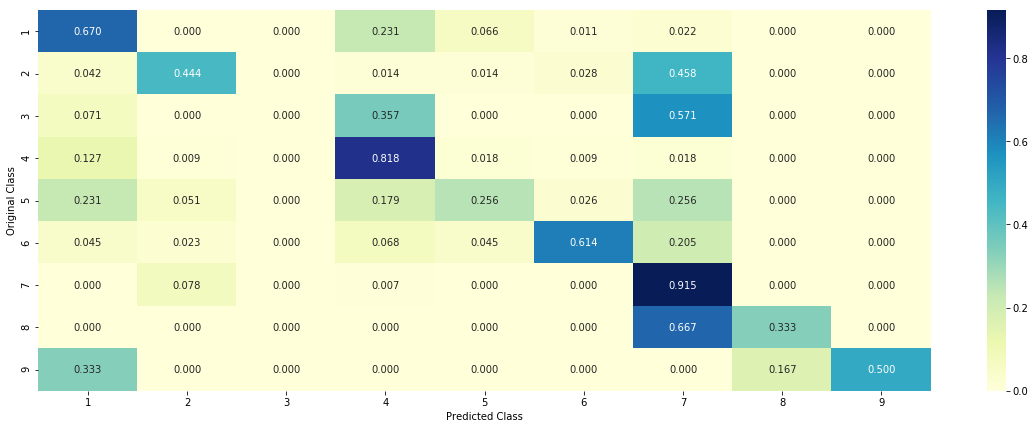

In [381]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log',)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

### CONCLUSION

* We have taken top 1k features for both bow and tfidf representation.
* We did hyperparameter tuning to get best parameter and reduce the log loss.
* when we used logistic regression(After Feature Engineering) on tfidf we got log-loss less than 1 which is what we wanted.

#### After Feature Engineering ,we managed to get logloss<1 .

### PROCEDURE OF SOLVING THE CASE STUDY:

* FIRSTLY,WE STARTED WITH LOADING DATA USING PANDAS LIBRARY.
* DID CLEANING,PREPROCESSING OF DATA USING VARIOUS NLP TECHNIQUES.
* DID EDA FOR UNDERSTANDING THE UNDERLYING PATTERN AND DISTRIBUTION OF DATA.
* CHECKED WHETHER EACH FEATURE IS IMPORTANT FOR FURTHER ANALYSIS USING UNIVARIATE ANALYSIS.
* CHECKED DISTRIBUTION OF CLASS LABEL AMONG TRAIN ,TEST, CV DATASET.
* BUILD A RANDOM MODEL TO FIND THE UPPERLIMIT OF THE LOGLOSS(== 2.5).
* GENERATED 9 CLASS PROBABILITIES RANDOMLY AND ENSURED THAT THEY SUM TO 1.
* USED ONE-HOT-ENCODING AND RESPONSE CODING FOR FEATURIZATION OF CATEGORICAL DATA.
* ON TEXT FEATURE WE USED BOW AND TFIDF AS FEATURIZATION TECHNIQUES AND TOOK ONLY TOP 1K FEATURES.
* BUILT MODEL ON EACH AND EVERY FEATURE TO ENSURE THAT THEY ARE USEFUL OR NOT.
* WE STARTED WITH NB AS OUR BASELINEMODEL AND THEN TRIED VARIOUS MODELS LIKE LOGISTIC REGRESSION,SVM,RF,STACKING,KNN ETC.
* SHOWED LOGLOSS FOR TRAIN,TEST,CV,MISCLASSIFICATION ERROR,CONFUSION MATRIX,PRECISION AND RECALL MATRIX FOR EACH MODEL .
* GAVE INTERPRETATION FOR EACH MODEL.
* DID FEATURE ENGINEERING BY COMBINING GIVEN FEATURE(GENE,VARIATION AND TEXT ) AS A NEW FEATURE.
* FINALLY GOT A LOGLOSS OF < 1.


In [384]:
from prettytable import PrettyTable

# Names of models
model=['Naive Bayes  ','KNN','Logistic Regression With Class balancing  ','Logistic Regression Without Class balancing','Linear SVM  ','Random Forest Classifier With One hot Encoding','Random Forest Classifier With Response Coding','Stack Models:LR+NB+SVM','Maximum Voting classifier','CountVectorizer Features, including both unigrams and bigrams','Feature Engineering']


train =[0.52 ,0.65 ,0.44 ,0.44 ,0.58 ,0.87 ,0.05 ,0.54 ,0.83 ,0.86 ,0.44]
cv=    [1.21 ,1.03 ,1.06 ,1.10 ,1.09 ,1.23 ,1.21 ,1.16 ,1.21 ,1.16 ,0.98]
test = [1.14 ,0.98 ,0.92 ,0.95 ,1.00 ,1.16 ,1.17 ,1.11 ,1.15 ,1.06 ,1.00]
mp=    [44   ,36   ,36   ,36   ,34   ,44   ,40   ,36   ,36   ,40   ,31]
num=[1,2,3,4,5,6,7,8,9,10,11]
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",num)
ptable.add_column("model",model)
ptable.add_column("train",train)
ptable.add_column("cv",cv)
ptable.add_column("test",test)
ptable.add_column("% Misclassified Points",mp)

# Printing the Table
print(ptable)

+-------+---------------------------------------------------------------+-------+------+------+------------------------+
| S.NO. |                             model                             | train |  cv  | test | % Misclassified Points |
+-------+---------------------------------------------------------------+-------+------+------+------------------------+
|   1   |                         Naive Bayes                           |  0.52 | 1.21 | 1.14 |           44           |
|   2   |                              KNN                              |  0.65 | 1.03 | 0.98 |           36           |
|   3   |           Logistic Regression With Class balancing            |  0.44 | 1.06 | 0.92 |           36           |
|   4   |          Logistic Regression Without Class balancing          |  0.44 | 1.1  | 0.95 |           36           |
|   5   |                          Linear SVM                           |  0.58 | 1.09 | 1.0  |           34           |
|   6   |         Random Forest 